# 📊 电商用户行为数据分析

## 项目背景
随着移动互联网进入下半场，告别粗放式增长，转向精细化运营。本分析旨在通过电商用户行为数据，为以下问题提供解释和改进建议：

1. **转化漏斗分析**：用户从浏览到最终购买的流失情况，确定瓶颈位置
2. **时间模式分析**：找出用户最活跃的日期和时间段
3. **产品分析**：找出最受欢迎的产品和类目
4. **用户价值分析**：识别核心付费用户群，推送个性化销售方案

## 分析方法与数学模型
- **描述性统计分析**：数据探索与特征分布
- **转化漏斗模型**：用户行为路径分析
- **RFM模型**：用户价值分层
- **K-Means聚类**：用户分群
- **马尔可夫链模型**：行为状态转移分析
- **帕累托分析**：二八法则识别核心产品

## 1. 导入所需库

In [3]:
# 数据处理库
import pandas as pd
import numpy as np
from datetime import datetime

# 可视化库
import matplotlib.pyplot as plt
import seaborn as sns

# 设置中文显示
plt.rcParams['font.sans-serif'] = ['SimHei', 'Microsoft YaHei', 'Arial Unicode MS']
plt.rcParams['axes.unicode_minus'] = False

# 设置显示选项
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)

# 忽略警告
import warnings
warnings.filterwarnings('ignore')

print("✅ 所有库导入成功！")

✅ 所有库导入成功！


## 1.5 下载文件校验

在处理数据之前，先验证下载的文件是否完整正确。

**校验方式**：
- 如果您有从阿里天池下载的 `UserBehavior.csv.zip.md5` 文件，请将其放在同目录下
- 或者手动输入官方提供的 MD5 值进行校验

In [2]:
# ====================================================================
# 下载文件完整性校验
# 验证从阿里天池下载的数据文件是否正确完整
# ====================================================================

import os
import hashlib

def get_file_md5(filepath):
    """计算文件的MD5哈希值"""
    print(f"   正在计算 {os.path.basename(filepath)} 的MD5值...")
    md5_hash = hashlib.md5()
    file_size = os.path.getsize(filepath)
    processed = 0
    with open(filepath, 'rb') as f:
        for chunk in iter(lambda: f.read(8192 * 1024), b''):  # 8MB chunks for speed
            md5_hash.update(chunk)
            processed += len(chunk)
            # 显示进度（每100MB更新一次）
            if processed % (100 * 1024 * 1024) < 8192 * 1024:
                print(f"   进度: {processed / (1024**2):.0f} MB / {file_size / (1024**2):.0f} MB", end='\r')
    print()  # 换行
    return md5_hash.hexdigest()

def verify_download():
    """验证下载文件的完整性"""
    print("=" * 60)
    print("🔐 下载文件完整性校验")
    print("=" * 60)
    
    # 可能的文件名
    zip_files = ['UserBehavior.csv.zip', 'data.zip']
    csv_files = ['UserBehavior.csv', 'data.csv']
    md5_files = ['UserBehavior.csv.zip.md5', 'data.zip.md5']
    
    # 查找存在的文件
    found_zip = None
    found_csv = None
    found_md5 = None
    
    for f in zip_files:
        if os.path.exists(f):
            found_zip = f
            break
    
    for f in csv_files:
        if os.path.exists(f):
            found_csv = f
            break
    
    for f in md5_files:
        if os.path.exists(f):
            found_md5 = f
            break
    
    # 显示找到的文件
    print("\n📁 检测到的文件:")
    if found_zip:
        size_mb = os.path.getsize(found_zip) / (1024**2)
        print(f"   ✅ {found_zip} ({size_mb:.2f} MB)")
    if found_csv:
        size_mb = os.path.getsize(found_csv) / (1024**3)
        print(f"   ✅ {found_csv} ({size_mb:.2f} GB)")
    if found_md5:
        print(f"   ✅ {found_md5}")
    
    if not found_zip and not found_csv:
        print("   ❌ 未找到数据文件")
        print("\n请将下载的数据文件放在当前目录下:")
        print(f"   当前目录: {os.getcwd()}")
        return
    
    # 读取官方MD5值
    expected_md5 = None
    if found_md5:
        with open(found_md5, 'r') as f:
            content = f.read().strip()
            # 支持多种MD5文件格式:
            # 格式1: "MD5 (filename) = hash" (BSD style)
            # 格式2: "hash  filename" (GNU style)
            # 格式3: "hash" (仅hash)
            if '=' in content:
                # BSD style: MD5 (filename) = hash
                expected_md5 = content.split('=')[-1].strip().lower()
            elif len(content.split()) >= 2:
                # GNU style: hash  filename
                expected_md5 = content.split()[0].lower()
            else:
                # 仅hash
                expected_md5 = content.lower()
        print(f"\n📋 官方MD5值: {expected_md5}")
    else:
        print("\n⚠️ 未找到 .md5 校验文件")
        print("   如果您有官方MD5值，可以手动输入进行校验")
    
    # 计算文件MD5
    target_file = found_zip if found_zip else found_csv
    print(f"\n🔄 计算 {target_file} 的MD5值...")
    actual_md5 = get_file_md5(target_file)
    print(f"   计算得到的MD5: {actual_md5}")
    
    # 校验结果
    if expected_md5:
        print("\n" + "=" * 60)
        if actual_md5.lower() == expected_md5.lower():
            print("✅ 校验通过！文件下载完整正确")
        else:
            print("❌ 校验失败！文件可能损坏或不完整")
            print(f"   期望: {expected_md5}")
            print(f"   实际: {actual_md5}")
            print("\n建议: 请重新下载文件")
        print("=" * 60)
    else:
        print("\n" + "=" * 60)
        print(f"📋 {target_file} 的MD5值:")
        print(f"   {actual_md5}")
        print("\n请与官方提供的MD5值进行比对")
        print("=" * 60)

# 执行校验
verify_download()

🔐 下载文件完整性校验

📁 检测到的文件:
   ✅ UserBehavior.csv.zip (905.80 MB)
   ✅ data.csv (3.42 GB)
   ✅ UserBehavior.csv.zip.md5

📋 官方MD5值: 2c67e9b4e3908fd30a3f43ec95a7de8c

🔄 计算 UserBehavior.csv.zip 的MD5值...
   正在计算 UserBehavior.csv.zip 的MD5值...
   进度: 906 MB / 906 MB
   计算得到的MD5: 2c67e9b4e3908fd30a3f43ec95a7de8c

✅ 校验通过！文件下载完整正确
   进度: 906 MB / 906 MB
   计算得到的MD5: 2c67e9b4e3908fd30a3f43ec95a7de8c

✅ 校验通过！文件下载完整正确


## 1.6 数据预处理（数据分离）

**此步骤只需运行一次！** 根据 Unix 时间戳过滤数据，生成以下CSV文件：
- `data_filtered.csv`: 有效数据（2017-11-25 至 2017-12-03）
- `data_outliers.csv`: 被过滤掉的异常日期数据

保留原始时间戳格式，后续分析时再转换，节省存储空间和内存。

In [4]:
# ====================================================================
# 数据预处理：根据时间戳分离数据
# 此单元格只需运行一次，生成过滤后的CSV文件
# 保留原始时间戳格式，节省存储空间
# ====================================================================

import os
import gc

# 检查是否已经生成过处理后的文件
if os.path.exists('data_filtered.csv'):
    print("✅ 检测到已存在 data_filtered.csv，跳过预处理步骤")
    print("   如需重新处理，请删除 data_filtered.csv 后重新运行此单元格")
else:
    print("=" * 60)
    print("🔄 开始数据预处理...")
    print("=" * 60)
    
    # 计算日期对应的 Unix 时间戳
    # 2017-11-25 00:00:00 UTC+8 -> Unix时间戳
    # 2017-12-03 23:59:59 UTC+8 -> Unix时间戳
    start_ts = int(pd.Timestamp('2017-11-25 00:00:00', tz='Asia/Shanghai').timestamp())
    end_ts = int(pd.Timestamp('2017-12-03 23:59:59', tz='Asia/Shanghai').timestamp())
    
    print(f"\n📅 过滤时间范围:")
    print(f"   开始: 2017-11-25 00:00:00 -> Unix时间戳: {start_ts}")
    print(f"   结束: 2017-12-03 23:59:59 -> Unix时间戳: {end_ts}")
    
    # Step 1: 读取原始CSV数据
    print("\n📖 Step 1: 读取原始数据 data.csv ...")
    df_raw = pd.read_csv('data.csv', header=None)
    df_raw.columns = ['用户ID', '商品ID', '商品类目ID', '行为类型', '时间戳']
    original_count = len(df_raw)
    print(f"   原始数据行数: {original_count:,}")
    
    # Step 2: 根据时间戳过滤数据
    print("\n🔍 Step 2: 根据时间戳过滤数据...")
    mask = (df_raw['时间戳'] >= start_ts) & (df_raw['时间戳'] <= end_ts)
    df_filtered = df_raw[mask]
    df_outliers = df_raw[~mask]
    
    filtered_count = len(df_filtered)
    outliers_count = len(df_outliers)
    
    print(f"   有效数据: {filtered_count:,} 行")
    print(f"   异常数据: {outliers_count:,} 行")
    
    # Step 3: 数据完整性校验
    print("\n🔐 Step 3: 数据完整性校验...")
    if filtered_count + outliers_count == original_count:
        print(f"   ✅ 行数校验通过: {filtered_count:,} + {outliers_count:,} = {original_count:,}")
    else:
        print(f"   ❌ 行数校验失败！")
        raise ValueError("数据分割后行数不匹配！")
    
    # Step 4: 保存过滤后的有效数据 (使用Unix换行符保持与原文件一致)
    print("\n💾 Step 4: 保存过滤后的数据 data_filtered.csv ...")
    df_filtered.to_csv('data_filtered.csv', index=False, header=False, encoding='utf-8', lineterminator='\n')
    print(f"   ✅ 已保存: data_filtered.csv ({filtered_count:,} 行)")
    
    # Step 5: 保存异常数据
    print("\n💾 Step 5: 保存异常数据 data_outliers.csv ...")
    df_outliers.to_csv('data_outliers.csv', index=False, header=False, encoding='utf-8', lineterminator='\n')
    print(f"   ✅ 已保存: data_outliers.csv ({outliers_count:,} 行)")
    
    # Step 6: 文件大小对比
    print("\n📊 Step 6: 文件大小对比...")
    size_original = os.path.getsize('data.csv') / (1024**2)
    size_filtered = os.path.getsize('data_filtered.csv') / (1024**2)
    size_outliers = os.path.getsize('data_outliers.csv') / (1024**2)
    print(f"   data.csv:          {size_original:.2f} MB")
    print(f"   data_filtered.csv: {size_filtered:.2f} MB")
    print(f"   data_outliers.csv: {size_outliers:.2f} MB")
    print(f"   分割后总大小:       {size_filtered + size_outliers:.2f} MB")
    
    # Step 7: 清理内存
    print("\n🧹 Step 7: 清理内存...")
    del df_raw, df_filtered, df_outliers, mask
    gc.collect()
    print("   ✅ 内存已清理")
    
    print("\n" + "=" * 60)
    print("✅ 数据预处理完成！")
    print("=" * 60)
    print("\n生成文件:")
    print("  • data_filtered.csv - 有效数据（用于后续分析）")
    print("  • data_outliers.csv - 异常日期数据（已排除）")

✅ 检测到已存在 data_filtered.csv，跳过预处理步骤
   如需重新处理，请删除 data_filtered.csv 后重新运行此单元格


## 2. 数据加载与结构探索

从预处理后的 `data_filtered.csv` 加载有效数据进行分析。

In [40]:
# 读取预处理后的数据
# 从 data_filtered.csv 加载，然后转换时间戳

import os

if os.path.exists('data_filtered.csv'):
    print("📖 读取预处理后的数据: data_filtered.csv ...")
    # 无表头格式，需要指定列名
    df = pd.read_csv('data_filtered.csv', header=None)
    df.columns = ['用户ID', '商品ID', '商品类目ID', '行为类型', '时间戳']
    print(f"   加载完成: {len(df):,} 行")
    
    # 转换时间戳为日期时间（UTC时间戳转换为北京时间 UTC+8）
    print("⏰ 转换时间戳为日期时间（UTC → 北京时间）...")
    # 原始时间戳是UTC，需要加8小时转换为北京时间
    df['时间'] = pd.to_datetime(df['时间戳'], unit='s') + pd.Timedelta(hours=8)
    df['日期'] = df['时间'].dt.date
    df['月份'] = df['时间'].dt.month
    df['序号'] = range(len(df))
    
    # 调整列顺序
    df = df[['序号', '用户ID', '商品ID', '商品类目ID', '行为类型', '时间', '日期', '月份']]
    
    print("✅ 数据加载成功！")
else:
    print("⚠️ 未找到 data_filtered.csv")
    print("   请先运行上方的「数据预处理」单元格生成该文件")
    raise FileNotFoundError("请先运行数据预处理单元格！")

print("=" * 60)
print("📋 数据集基本信息")
print("=" * 60)
print(f"数据形状: {len(df):,} 行 × {df.shape[1]} 列")
print(f"\n列名: {df.columns.tolist()}")

print("\n" + "=" * 60)
print("📊 数据类型")
print("=" * 60)
print(df.dtypes)

print("\n" + "=" * 60)
print("🔍 数据时间范围")
print("=" * 60)
print(f"开始日期: {df['日期'].min()}")
print(f"结束日期: {df['日期'].max()}")

print("\n" + "=" * 60)
print("🔍 前10行数据预览")
print("=" * 60)
df.head(10)

📖 读取预处理后的数据: data_filtered.csv ...
   加载完成: 100,095,231 行
⏰ 转换时间戳为日期时间（UTC → 北京时间）...
   加载完成: 100,095,231 行
⏰ 转换时间戳为日期时间（UTC → 北京时间）...
✅ 数据加载成功！
📋 数据集基本信息
数据形状: 100,095,231 行 × 8 列

列名: ['序号', '用户ID', '商品ID', '商品类目ID', '行为类型', '时间', '日期', '月份']

📊 数据类型
序号                 int64
用户ID               int64
商品ID               int64
商品类目ID             int64
行为类型              object
时间        datetime64[ns]
日期                object
月份                 int32
dtype: object

🔍 数据时间范围
✅ 数据加载成功！
📋 数据集基本信息
数据形状: 100,095,231 行 × 8 列

列名: ['序号', '用户ID', '商品ID', '商品类目ID', '行为类型', '时间', '日期', '月份']

📊 数据类型
序号                 int64
用户ID               int64
商品ID               int64
商品类目ID             int64
行为类型              object
时间        datetime64[ns]
日期                object
月份                 int32
dtype: object

🔍 数据时间范围
开始日期: 2017-11-25
开始日期: 2017-11-25
结束日期: 2017-12-03

🔍 前10行数据预览
结束日期: 2017-12-03

🔍 前10行数据预览


,序号,用户ID,商品ID,商品类目ID,行为类型,时间,日期,月份
0,0,1,2268318,2520377,pv,2017-11-25 01:21:10,2017-11-25,11
1,1,1,2333346,2520771,pv,2017-11-25 06:15:33,2017-11-25,11
2,2,1,2576651,149192,pv,2017-11-25 09:21:25,2017-11-25,11
3,3,1,3830808,4181361,pv,2017-11-25 15:04:53,2017-11-25,11
4,4,1,4365585,2520377,pv,2017-11-25 15:49:06,2017-11-25,11
5,5,1,4606018,2735466,pv,2017-11-25 21:28:01,2017-11-25,11
6,6,1,230380,411153,pv,2017-11-26 05:22:22,2017-11-26,11
7,7,1,3827899,2920476,pv,2017-11-27 00:24:33,2017-11-27,11
8,8,1,3745169,2891509,pv,2017-11-27 03:44:31,2017-11-27,11
9,9,1,1531036,2920476,pv,2017-11-27 06:02:12,2017-11-27,11


In [6]:
# 统计描述
print("=" * 60)
print("📈 数值型字段统计描述")
print("=" * 60)
df.describe()

📈 数值型字段统计描述


,序号,用户ID,商品ID,商品类目ID,时间,月份
count,1.000952e+08,1.000952e+08,1.000952e+08,1.000952e+08,100095231,1.000952e+08
mean,5.004762e+07,5.069415e+05,2.579782e+06,2.696403e+06,2017-11-29 13:15:17.659393024,1.137037e+01
min,0.000000e+00,1.000000e+00,1.000000e+00,8.000000e+01,2017-11-24 16:00:00,1.100000e+01
25%,2.502381e+07,2.524270e+05,1.295225e+06,1.320293e+06,2017-11-27 05:55:12,1.100000e+01
50%,5.004762e+07,5.040140e+05,2.580759e+06,2.671397e+06,2017-11-29 14:11:38,1.100000e+01
75%,7.507142e+07,7.609445e+05,3.862042e+06,4.145813e+06,2017-12-02 01:45:53,1.200000e+01
max,1.000952e+08,1.018011e+06,5.163070e+06,5.162429e+06,2017-12-03 15:59:59,1.200000e+01
std,2.889500e+07,2.940603e+05,1.488057e+06,1.463157e+06,NaN,4.829050e-01


In [7]:
# 各字段唯一值统计
print("=" * 60)
print("🔢 各字段唯一值数量")
print("=" * 60)
for col in df.columns:
    print(f"{col}: {df[col].nunique():,} 个唯一值")

print("\n" + "=" * 60)
print("📊 行为类型分布")
print("=" * 60)
behavior_counts = df['行为类型'].value_counts()
print(behavior_counts)
print(f"\n行为类型说明:")
print("• pv (page view): 浏览")
print("• cart: 加入购物车")
print("• fav (favorite): 收藏")
print("• buy: 购买")

🔢 各字段唯一值数量
序号: 100,095,231 个唯一值
序号: 100,095,231 个唯一值
用户ID: 987,991 个唯一值
用户ID: 987,991 个唯一值
商品ID: 4,161,138 个唯一值
商品ID: 4,161,138 个唯一值
商品类目ID: 9,437 个唯一值
商品类目ID: 9,437 个唯一值
行为类型: 4 个唯一值
行为类型: 4 个唯一值
时间: 777,600 个唯一值
日期: 10 个唯一值
时间: 777,600 个唯一值
日期: 10 个唯一值
月份: 2 个唯一值

📊 行为类型分布
行为类型
pv      89660688
cart     5530446
fav      2888258
buy      2015839
Name: count, dtype: int64

行为类型说明:
• pv (page view): 浏览
• cart: 加入购物车
• fav (favorite): 收藏
• buy: 购买
月份: 2 个唯一值

📊 行为类型分布
行为类型
pv      89660688
cart     5530446
fav      2888258
buy      2015839
Name: count, dtype: int64

行为类型说明:
• pv (page view): 浏览
• cart: 加入购物车
• fav (favorite): 收藏
• buy: 购买


## 3. 数据预处理

### 3.1 缺失值检测与处理

🔍 缺失值检测
        缺失数量  缺失比例(%)
序号         0      0.0
用户ID       0      0.0
商品ID       0      0.0
商品类目ID     0      0.0
行为类型       0      0.0
时间         0      0.0
日期         0      0.0
月份         0      0.0
        缺失数量  缺失比例(%)
序号         0      0.0
用户ID       0      0.0
商品ID       0      0.0
商品类目ID     0      0.0
行为类型       0      0.0
时间         0      0.0
日期         0      0.0
月份         0      0.0


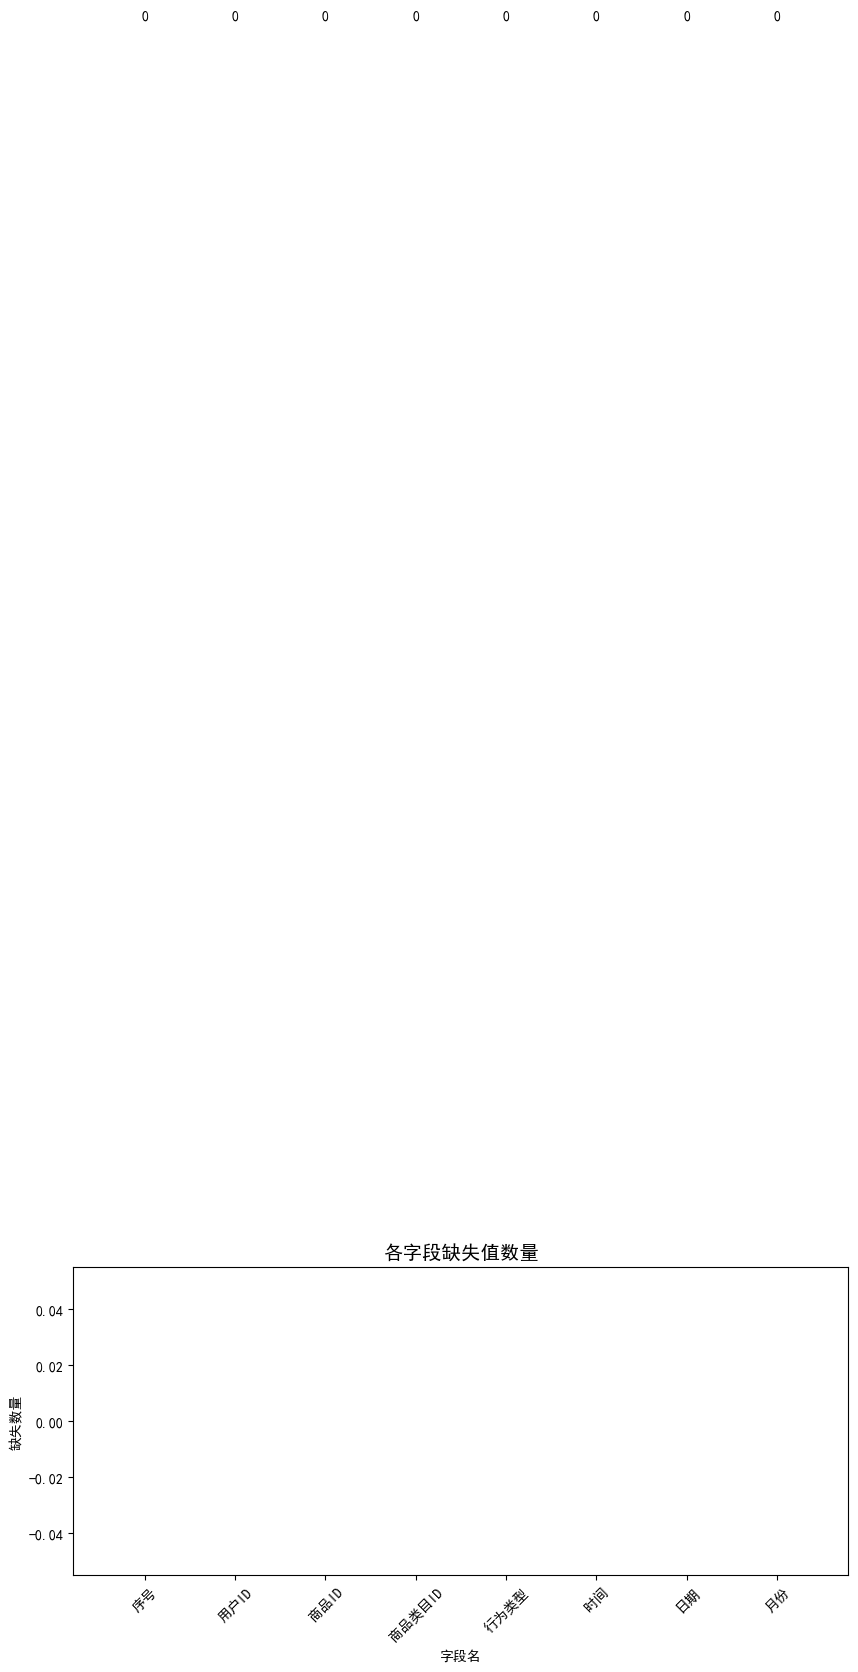


✅ 结论: 数据集无缺失值，数据质量良好！


In [8]:
# 缺失值检测
print("=" * 60)
print("🔍 缺失值检测")
print("=" * 60)
missing = df.isnull().sum()
missing_pct = (df.isnull().sum() / len(df) * 100).round(2)
missing_df = pd.DataFrame({'缺失数量': missing, '缺失比例(%)': missing_pct})
print(missing_df)

# 可视化缺失值
fig, ax = plt.subplots(figsize=(10, 4))
colors = ['#2ecc71' if x == 0 else '#e74c3c' for x in missing.values]
bars = ax.bar(missing.index, missing.values, color=colors)
ax.set_title('各字段缺失值数量', fontsize=14, fontweight='bold')
ax.set_xlabel('字段名')
ax.set_ylabel('缺失数量')
plt.xticks(rotation=45)
for bar, val in zip(bars, missing.values):
    ax.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.5, str(val), 
            ha='center', va='bottom', fontsize=10)
plt.tight_layout()
plt.show()

print("\n✅ 结论: 数据集无缺失值，数据质量良好！")

### 3.2 重复值检测与处理

In [9]:
# 重复值检测
print("=" * 60)
print("🔍 重复值检测")
print("=" * 60)

# 完全重复行（排除序号列）
duplicates = df.drop('序号', axis=1).duplicated().sum()
print(f"完全重复行数: {duplicates}")

# 基于用户+商品+行为+时间的重复
key_duplicates = df.duplicated(subset=['用户ID', '商品ID', '行为类型', '时间']).sum()
print(f"用户-商品-行为-时间 重复行数: {key_duplicates}")

if duplicates > 0:
    print(f"\n⚠️ 发现 {duplicates} 条重复记录，进行去重处理...")
    df_cleaned = df.drop_duplicates(subset=['用户ID', '商品ID', '行为类型', '时间'])
    print(f"去重前: {len(df)} 行")
    print(f"去重后: {len(df_cleaned)} 行")
    df = df_cleaned
else:
    print("\n✅ 无重复记录")

🔍 重复值检测
完全重复行数: 49
完全重复行数: 49
用户-商品-行为-时间 重复行数: 49

⚠️ 发现 49 条重复记录，进行去重处理...
用户-商品-行为-时间 重复行数: 49

⚠️ 发现 49 条重复记录，进行去重处理...
去重前: 100095231 行
去重后: 100095182 行
去重前: 100095231 行
去重后: 100095182 行


### 3.3 时间特征提取

In [32]:
# 时间特征提取
print("=" * 60)
print("⏰ 时间特征提取")
print("=" * 60)

# 确保时间列是datetime类型
df['时间'] = pd.to_datetime(df['时间'])

# 提取时间特征
df['日期_str'] = df['时间'].dt.strftime('%Y-%m-%d')
df['小时'] = df['时间'].dt.hour
df['星期'] = df['时间'].dt.dayofweek  # 0=周一, 6=周日
df['星期名称'] = df['时间'].dt.day_name()

# 定义时间段
def get_time_period(hour):
    if 0 <= hour < 6:
        return '凌晨(0-6点)'
    elif 6 <= hour < 12:
        return '上午(6-12点)'
    elif 12 <= hour < 18:
        return '下午(12-18点)'
    else:
        return '晚上(18-24点)'

df['时间段'] = df['小时'].apply(get_time_period)

print("新增时间特征列:")
print(df[['时间', '日期_str', '小时', '星期', '星期名称', '时间段']].head(10))

print(f"\n数据时间范围: {df['时间'].min()} 至 {df['时间'].max()}")

⏰ 时间特征提取
新增时间特征列:
新增时间特征列:
                   时间      日期_str  小时  星期      星期名称         时间段
0 2017-11-25 01:21:10  2017-11-25   1   5  Saturday    凌晨(0-6点)
1 2017-11-25 06:15:33  2017-11-25   6   5  Saturday   上午(6-12点)
2 2017-11-25 09:21:25  2017-11-25   9   5  Saturday   上午(6-12点)
3 2017-11-25 15:04:53  2017-11-25  15   5  Saturday  下午(12-18点)
4 2017-11-25 15:49:06  2017-11-25  15   5  Saturday  下午(12-18点)
5 2017-11-25 21:28:01  2017-11-25  21   5  Saturday  晚上(18-24点)
6 2017-11-26 05:22:22  2017-11-26   5   6    Sunday    凌晨(0-6点)
7 2017-11-27 00:24:33  2017-11-27   0   0    Monday    凌晨(0-6点)
8 2017-11-27 03:44:31  2017-11-27   3   0    Monday    凌晨(0-6点)
9 2017-11-27 06:02:12  2017-11-27   6   0    Monday   上午(6-12点)
                   时间      日期_str  小时  星期      星期名称         时间段
0 2017-11-25 01:21:10  2017-11-25   1   5  Saturday    凌晨(0-6点)
1 2017-11-25 06:15:33  2017-11-25   6   5  Saturday   上午(6-12点)
2 2017-11-25 09:21:25  2017-11-25   9   5  Saturday   上午(6-12点)
3 2017-11-25 

### 3.4 异常值检测与处理

🔍 异常值检测 - 用户行为频次分析
📊 用户行为次数统计:
  • 用户总数: 987991
  • 最小行为次数: 1
  • 最大行为次数: 848
  • 平均行为次数: 101.31
  • 中位数: 75.0

📈 IQR分析:
  • Q1 (25%分位数): 39.0
  • Q3 (75%分位数): 136.0
  • IQR: 97.0
  • 异常值下界: -106.5
  • 异常值上界: 281.5

🔍 检测到 47671 个高活跃用户（行为次数高于多数用户）
   高活跃用户行为次数范围: 282 ~ 848
📊 用户行为次数统计:
  • 用户总数: 987991
  • 最小行为次数: 1
  • 最大行为次数: 848
  • 平均行为次数: 101.31
  • 中位数: 75.0

📈 IQR分析:
  • Q1 (25%分位数): 39.0
  • Q3 (75%分位数): 136.0
  • IQR: 97.0
  • 异常值下界: -106.5
  • 异常值上界: 281.5

🔍 检测到 47671 个高活跃用户（行为次数高于多数用户）
   高活跃用户行为次数范围: 282 ~ 848


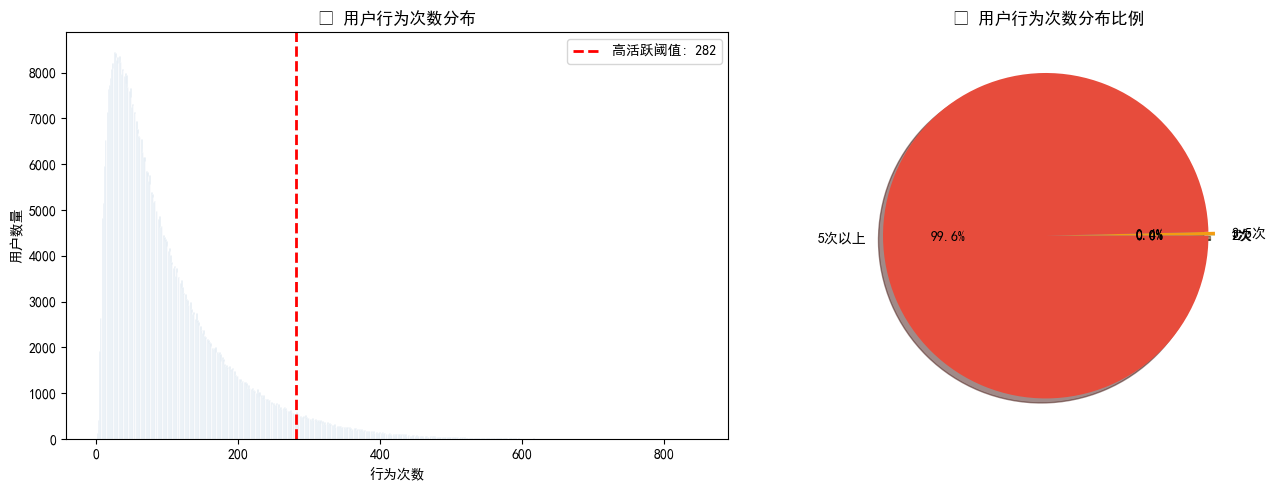


💡 分析结论:
  • 0.0% 的用户只有1次行为记录
  • 这是抽样数据的正常特征，反映了用户行为的长尾分布
  • 高活跃用户是重点运营对象


In [11]:
# 异常值检测 - 使用箱线图方法检测用户行为频次
print("=" * 60)
print("🔍 异常值检测 - 用户行为频次分析")
print("=" * 60)

# 统计每个用户的行为次数
user_behavior_count = df.groupby('用户ID').size().reset_index(name='行为次数')

# 基本统计
print("📊 用户行为次数统计:")
print(f"  • 用户总数: {len(user_behavior_count)}")
print(f"  • 最小行为次数: {user_behavior_count['行为次数'].min()}")
print(f"  • 最大行为次数: {user_behavior_count['行为次数'].max()}")
print(f"  • 平均行为次数: {user_behavior_count['行为次数'].mean():.2f}")
print(f"  • 中位数: {user_behavior_count['行为次数'].median()}")

# 使用IQR方法检测异常值
Q1 = user_behavior_count['行为次数'].quantile(0.25)
Q3 = user_behavior_count['行为次数'].quantile(0.75)
IQR = Q3 - Q1

print(f"\n📈 IQR分析:")
print(f"  • Q1 (25%分位数): {Q1}")
print(f"  • Q3 (75%分位数): {Q3}")
print(f"  • IQR: {IQR}")

# 处理IQR=0的情况（大多数用户行为次数相同）
if IQR == 0:
    print("\n⚠️ 注意: IQR=0，说明大多数用户行为次数相同")
    print("   使用百分位数方法识别高活跃用户...")
    # 使用95%分位数作为阈值
    upper_bound = user_behavior_count['行为次数'].quantile(0.95)
    lower_bound = 0
    outliers = user_behavior_count[user_behavior_count['行为次数'] > upper_bound]
    print(f"  • 95%分位数阈值: {upper_bound}")
else:
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = user_behavior_count[(user_behavior_count['行为次数'] < lower_bound) | 
                                    (user_behavior_count['行为次数'] > upper_bound)]
    print(f"  • 异常值下界: {lower_bound}")
    print(f"  • 异常值上界: {upper_bound}")

print(f"\n🔍 检测到 {len(outliers)} 个高活跃用户（行为次数高于多数用户）")
if len(outliers) > 0:
    print(f"   高活跃用户行为次数范围: {outliers['行为次数'].min()} ~ {outliers['行为次数'].max()}")

# 可视化
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# 1. 行为次数分布直方图
behavior_counts = user_behavior_count['行为次数'].value_counts().sort_index()
axes[0].bar(behavior_counts.index, behavior_counts.values, color='steelblue', edgecolor='white', alpha=0.7)
if upper_bound > 1:
    axes[0].axvline(upper_bound, color='red', linestyle='--', linewidth=2, label=f'高活跃阈值: {upper_bound:.0f}')
axes[0].set_title('📊 用户行为次数分布', fontsize=12, fontweight='bold')
axes[0].set_xlabel('行为次数')
axes[0].set_ylabel('用户数量')
axes[0].legend()

# 2. 行为次数饼图（分组统计）
def categorize_behavior(count):
    if count == 1:
        return '1次'
    elif count == 2:
        return '2次'
    elif count <= 5:
        return '3-5次'
    else:
        return '5次以上'

user_behavior_count['行为分类'] = user_behavior_count['行为次数'].apply(categorize_behavior)
category_counts = user_behavior_count['行为分类'].value_counts()

# 按照逻辑顺序排序
order = ['1次', '2次', '3-5次', '5次以上']
category_counts = category_counts.reindex([c for c in order if c in category_counts.index])

colors = ['#3498db', '#2ecc71', '#f39c12', '#e74c3c'][:len(category_counts)]
axes[1].pie(category_counts.values, labels=category_counts.index, autopct='%1.1f%%',
           colors=colors, explode=[0.02]*len(category_counts), shadow=True)
axes[1].set_title('📈 用户行为次数分布比例', fontsize=12, fontweight='bold')

plt.tight_layout()
plt.show()

print("\n💡 分析结论:")
single_action_pct = len(user_behavior_count[user_behavior_count['行为次数'] == 1]) / len(user_behavior_count) * 100
print(f"  • {single_action_pct:.1f}% 的用户只有1次行为记录")
print(f"  • 这是抽样数据的正常特征，反映了用户行为的长尾分布")
print(f"  • 高活跃用户是重点运营对象")

### 3.5 数据预处理总结

In [12]:
# 数据预处理总结
print("=" * 60)
print("📋 数据预处理完成 - 清洗后数据概览")
print("=" * 60)
print(f"• 总记录数: {len(df):,}")
print(f"• 总用户数: {df['用户ID'].nunique():,}")
print(f"• 总商品数: {df['商品ID'].nunique():,}")
print(f"• 总类目数: {df['商品类目ID'].nunique():,}")
print(f"• 数据时间范围: {df['时间'].min().date()} 至 {df['时间'].max().date()}")
print(f"• 数据天数: {(df['时间'].max() - df['时间'].min()).days + 1} 天")

print("\n📊 行为类型分布:")
behavior_stats = df['行为类型'].value_counts()
for behavior, count in behavior_stats.items():
    pct = count / len(df) * 100
    print(f"  • {behavior}: {count:,} ({pct:.2f}%)")

# 显示处理后的数据结构
print("\n📋 处理后的数据结构:")
print(df.info())

📋 数据预处理完成 - 清洗后数据概览
• 总记录数: 100,095,182
• 总用户数: 987,991
• 总用户数: 987,991
• 总商品数: 4,161,138
• 总商品数: 4,161,138
• 总类目数: 9,437
• 总类目数: 9,437
• 数据时间范围: 2017-11-24 至 2017-12-03
• 数据时间范围: 2017-11-24 至 2017-12-03
• 数据天数: 9 天

📊 行为类型分布:
  • pv: 89,660,671 (89.58%)
  • cart: 5,530,446 (5.53%)
  • fav: 2,888,258 (2.89%)
  • buy: 2,015,807 (2.01%)

📋 处理后的数据结构:
<class 'pandas.core.frame.DataFrame'>
Index: 100095182 entries, 0 to 100095230
Data columns (total 13 columns):
 #   Column  Dtype         
---  ------  -----         
 0   序号      int64         
 1   用户ID    int64         
 2   商品ID    int64         
 3   商品类目ID  int64         
 4   行为类型    object        
 5   时间      datetime64[ns]
 6   日期      object        
 7   月份      int32         
 8   日期_str  object        
 9   小时      int32         
 10  星期      int32         
 11  星期名称    object        
 12  时间段     object        
dtypes: datetime64[ns](1), int32(3), int64(4), object(5)
memory usage: 9.3+ GB
None
• 数据天数: 9 天

📊 行为类型分布:
  • pv: 89,

---

## 4. 用户行为时间模式分析

> 分析目标：找出用户最活跃的日期以及每天活跃的时间段，了解用户的行为时间模式

📅 每日用户活跃量分析
             活跃用户数     行为总次数
日期_str                      
2017-12-02  941709  13940942
2017-12-03  917512  11960273
2017-12-01  753166  11171505
2017-11-30  730809  10541695
2017-11-29  719356  10319060
2017-11-26  713522  10571039
2017-11-27  709207  10013455
2017-11-28  708339   9884185
2017-11-25  705571  10511597
2017-11-24  164703   1181431
             活跃用户数     行为总次数
日期_str                      
2017-12-02  941709  13940942
2017-12-03  917512  11960273
2017-12-01  753166  11171505
2017-11-30  730809  10541695
2017-11-29  719356  10319060
2017-11-26  713522  10571039
2017-11-27  709207  10013455
2017-11-28  708339   9884185
2017-11-25  705571  10511597
2017-11-24  164703   1181431


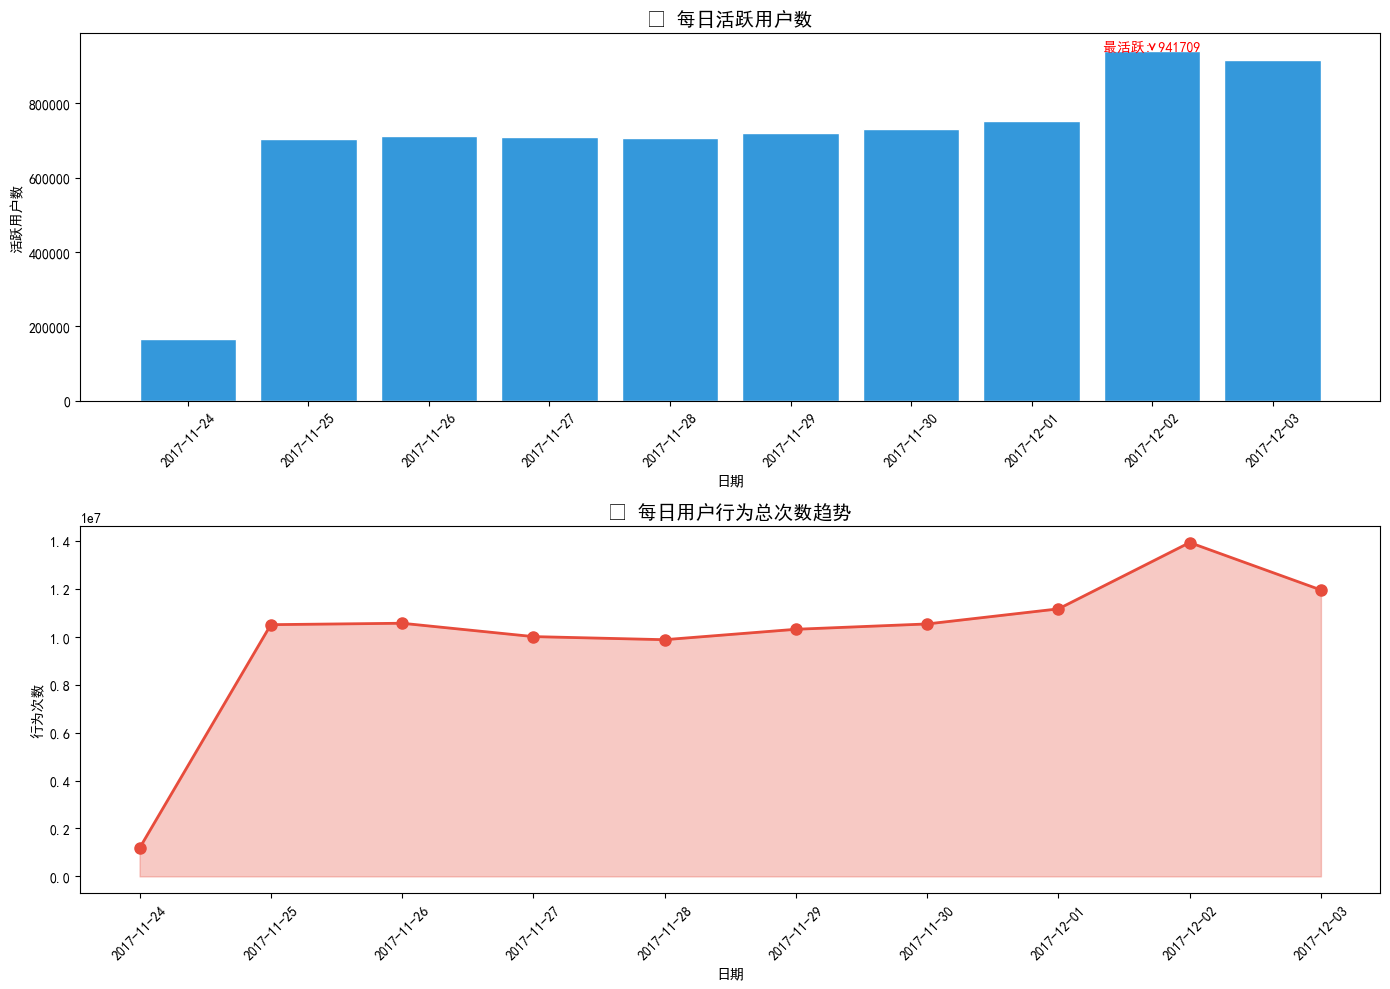


🏆 最活跃日期: 2017-12-02，活跃用户数: 941709


In [13]:
# 每日用户活跃量分析
print("=" * 60)
print("📅 每日用户活跃量分析")
print("=" * 60)

# 按日期统计
daily_stats = df.groupby('日期_str').agg({
    '用户ID': 'nunique',
    '序号': 'count'
}).rename(columns={'用户ID': '活跃用户数', '序号': '行为总次数'})

print(daily_stats.sort_values('活跃用户数', ascending=False))

# 可视化
fig, axes = plt.subplots(2, 1, figsize=(14, 10))

# 每日活跃用户数
x_dates = daily_stats.index
axes[0].bar(x_dates, daily_stats['活跃用户数'], color='#3498db', edgecolor='white')
axes[0].set_title('📊 每日活跃用户数', fontsize=14, fontweight='bold')
axes[0].set_xlabel('日期')
axes[0].set_ylabel('活跃用户数')
axes[0].tick_params(axis='x', rotation=45)
# 标注最高值
max_idx = daily_stats['活跃用户数'].idxmax()
max_val = daily_stats['活跃用户数'].max()
axes[0].annotate(f'最活跃: {max_val}', xy=(max_idx, max_val), 
                 xytext=(max_idx, max_val + 50),
                 ha='center', fontsize=10, color='red',
                 arrowprops=dict(arrowstyle='->', color='red'))

# 每日行为总次数
axes[1].plot(x_dates, daily_stats['行为总次数'], marker='o', color='#e74c3c', linewidth=2, markersize=8)
axes[1].fill_between(x_dates, daily_stats['行为总次数'], alpha=0.3, color='#e74c3c')
axes[1].set_title('📈 每日用户行为总次数趋势', fontsize=14, fontweight='bold')
axes[1].set_xlabel('日期')
axes[1].set_ylabel('行为次数')
axes[1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

print(f"\n🏆 最活跃日期: {max_idx}，活跃用户数: {max_val}")

⏰ 用户行为分布热力图（30分钟粒度）


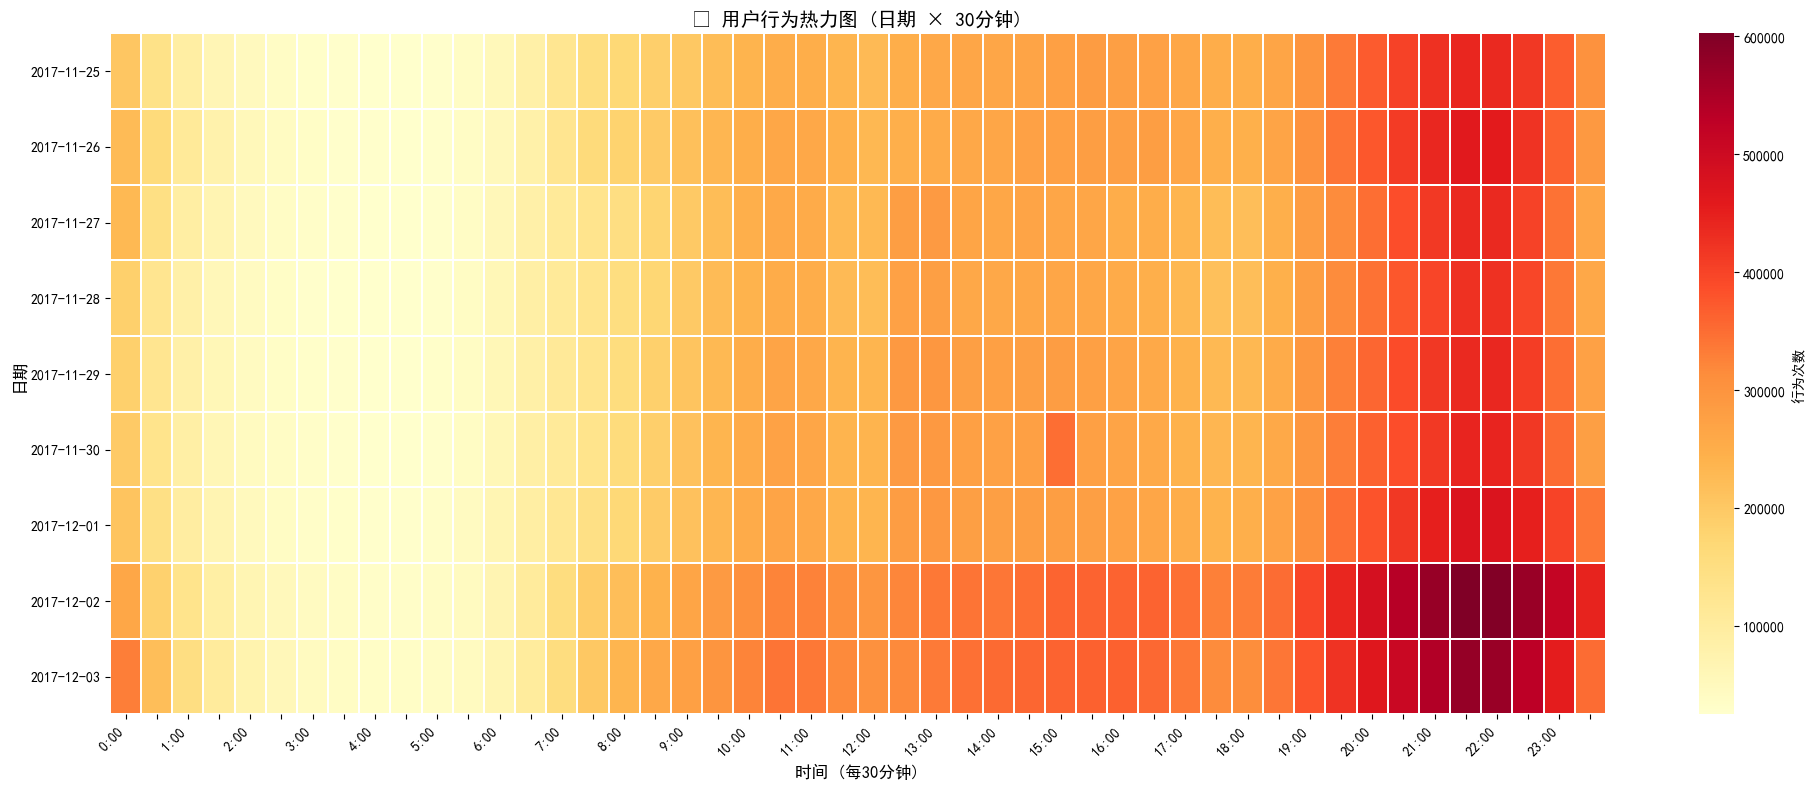


📊 每小时行为次数统计:
小时
21    8369714
22    8299812
20    7304809
23    6291228
19    6021741
15    5365029
13    5208034
14    5189882
16    5151948
10    4877458
dtype: int64


In [33]:
# 每小时用户行为分布 - 热力图（30分钟时间步长）
print("=" * 60)
print("⏰ 用户行为分布热力图（30分钟粒度）")
print("=" * 60)

# 创建30分钟时间槽
df['半小时槽'] = df['小时'] + (df['时间'].dt.minute // 30) * 0.5

# 创建日期-半小时的透视表
half_hourly_pivot = df.pivot_table(
    values='序号', 
    index='日期_str', 
    columns='半小时槽', 
    aggfunc='count',
    fill_value=0
)

# 生成时间标签 (0:00, 0:30, 1:00, ...)
time_labels = [f"{int(h)}:{int((h%1)*60):02d}" for h in half_hourly_pivot.columns]

# 绘制热力图
fig, ax = plt.subplots(figsize=(20, 8))
sns.heatmap(half_hourly_pivot, cmap='YlOrRd', annot=False, fmt='d', 
            linewidths=0.3, cbar_kws={'label': '行为次数'}, ax=ax,
            xticklabels=time_labels)
ax.set_title('🔥 用户行为热力图 (日期 × 30分钟)', fontsize=14, fontweight='bold')
ax.set_xlabel('时间 (每30分钟)', fontsize=12)
ax.set_ylabel('日期', fontsize=12)
# 每隔2个显示一个刻度标签，避免过于拥挤
plt.xticks(rotation=45, ha='right')
for i, label in enumerate(ax.get_xticklabels()):
    if i % 2 != 0:
        label.set_visible(False)
plt.tight_layout()
plt.show()

# 每小时汇总统计
hourly_stats = df.groupby('小时').size()
print("\n📊 每小时行为次数统计:")
print(hourly_stats.sort_values(ascending=False).head(10))

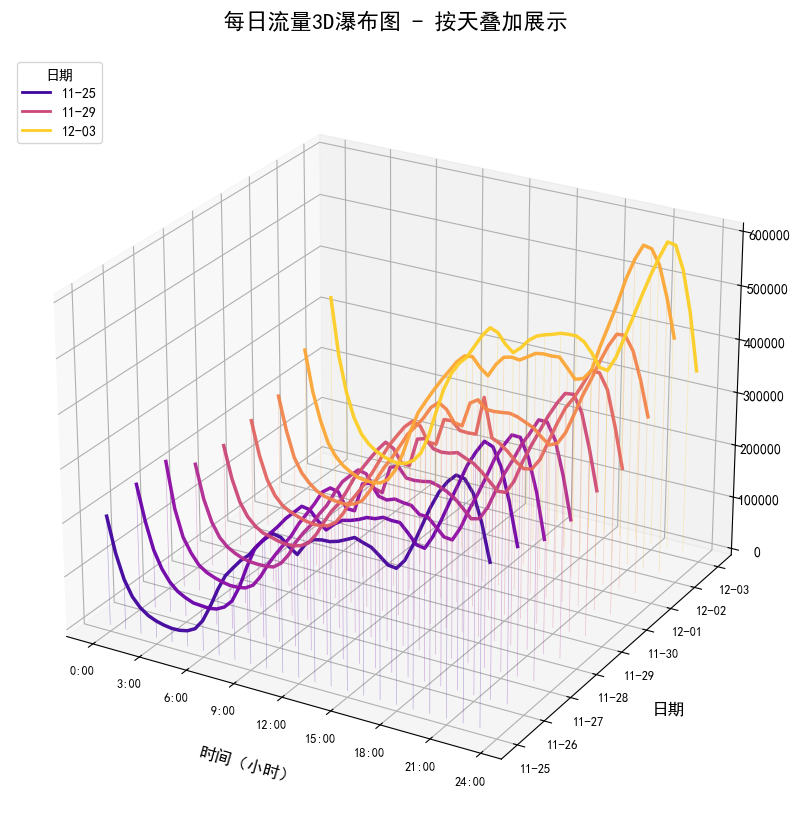


📊 3D流量图说明：
- 数据范围：2017-11-25 至 2017-12-03，共 9 天
- 每条曲线代表一天的流量变化（30分钟粒度）
- 可清晰对比不同日期的流量峰值和波动规律


In [ ]:
# 3D流量曲面图 - 每日流量曲线叠加（内存优化版本）
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# 设置中文字体
plt.rcParams['font.sans-serif'] = ['SimHei', 'Microsoft YaHei', 'DejaVu Sans']
plt.rcParams['axes.unicode_minus'] = False

# ========== 自动检测并加载数据 ==========
if 'df' not in dir() or df is None or len(df) == 0:
    print("⏳ 数据未加载，正在自动读取 data_filtered.csv ...")
    df = pd.read_csv('data_filtered.csv')
    # 转换时间戳（UTC → 北京时间 +8小时）
    df['时间'] = pd.to_datetime(df['时间戳'] + 8*3600, unit='s')
    df['日期'] = df['时间'].dt.strftime('%Y-%m-%d')
    print(f"✅ 数据加载完成: {len(df):,} 行")
else:
    print(f"✅ 使用已加载的数据: {len(df):,} 行")

# ========== 生成3D图 ==========
# 提取小时和分钟用于30分钟时段索引
half_hour_idx = (df['时间'].dt.hour * 2 + df['时间'].dt.minute // 30)

# 使用日期列进行分组
traffic_stats = df.groupby([df['日期'], half_hour_idx]).size().reset_index()
traffic_stats.columns = ['date', 'half_hour', 'count']

# 创建透视表
pivot_3d = traffic_stats.pivot(index='date', columns='half_hour', values='count').fillna(0)

# 确保所有48个时段都存在
for i in range(48):
    if i not in pivot_3d.columns:
        pivot_3d[i] = 0
pivot_3d = pivot_3d.reindex(columns=sorted(pivot_3d.columns))

# 准备3D数据
dates = [str(d) for d in pivot_3d.index]
n_days = len(dates)

# X轴：时间（小时）
X = np.arange(48) / 2  # 0, 0.5, 1, 1.5, ... 23.5
Y = np.arange(n_days)
Z = pivot_3d.values

# 创建3D图
fig = plt.figure(figsize=(16, 10))
ax = fig.add_subplot(111, projection='3d')

# 为每一天绘制一条曲线
colors_3d = plt.cm.plasma(np.linspace(0.1, 0.9, n_days))

for i in range(n_days):
    xs = X
    ys = np.ones_like(X) * i
    zs = Z[i, :]
    
    # 绘制曲线
    ax.plot(xs, ys, zs, color=colors_3d[i], linewidth=2.5, alpha=0.95)
    
    # 添加垂直填充线（增加立体感）
    for j in range(0, len(xs), 2):
        ax.plot([xs[j], xs[j]], [ys[j], ys[j]], [0, zs[j]], 
                color=colors_3d[i], linewidth=0.5, alpha=0.3)

# 设置标签
ax.set_xlabel('\n时间（小时）', fontsize=12, labelpad=10)
ax.set_ylabel('\n日期', fontsize=12, labelpad=10)
ax.set_zlabel('\n流量（次）', fontsize=12, labelpad=10)
ax.set_title('每日流量3D瀑布图 - 按天叠加展示', fontsize=16, fontweight='bold', pad=20)

# 设置Y轴刻度为日期（只显示月-日）
date_labels = [d[5:] if len(d) > 5 else d for d in dates]
ax.set_yticks(range(n_days))
ax.set_yticklabels(date_labels, fontsize=9)

# 设置X轴刻度
ax.set_xticks(range(0, 25, 3))
ax.set_xticklabels([f'{h}:00' for h in range(0, 25, 3)], fontsize=9)

# 设置视角（斜着看）
ax.view_init(elev=25, azim=-60)

# 添加图例
from matplotlib.lines import Line2D
legend_elements = [Line2D([0], [0], color=colors_3d[0], lw=2, label=date_labels[0]),
                   Line2D([0], [0], color=colors_3d[n_days//2], lw=2, label=date_labels[n_days//2]),
                   Line2D([0], [0], color=colors_3d[-1], lw=2, label=date_labels[-1])]
ax.legend(handles=legend_elements, loc='upper left', title='日期')

plt.tight_layout()
plt.savefig('3d_traffic_waterfall.png', dpi=150, bbox_inches='tight', facecolor='white')
plt.show()

print(f"\n📊 3D流量图说明：")
print(f"- 数据范围：{dates[0]} 至 {dates[-1]}，共 {n_days} 天")
print(f"- 每条曲线代表一天的流量变化（30分钟粒度）")
print(f"- 可清晰对比不同日期的流量峰值和波动规律")

🕐 不同时间段用户行为分布
             活跃用户数      行为次数
时间段                         
凌晨(0-6点)    941306  27183867
上午(6-12点)   957534  31222132
下午(12-18点)  942905  35249366
晚上(18-24点)  485205   6439817
             活跃用户数      行为次数
时间段                         
凌晨(0-6点)    941306  27183867
上午(6-12点)   957534  31222132
下午(12-18点)  942905  35249366
晚上(18-24点)  485205   6439817


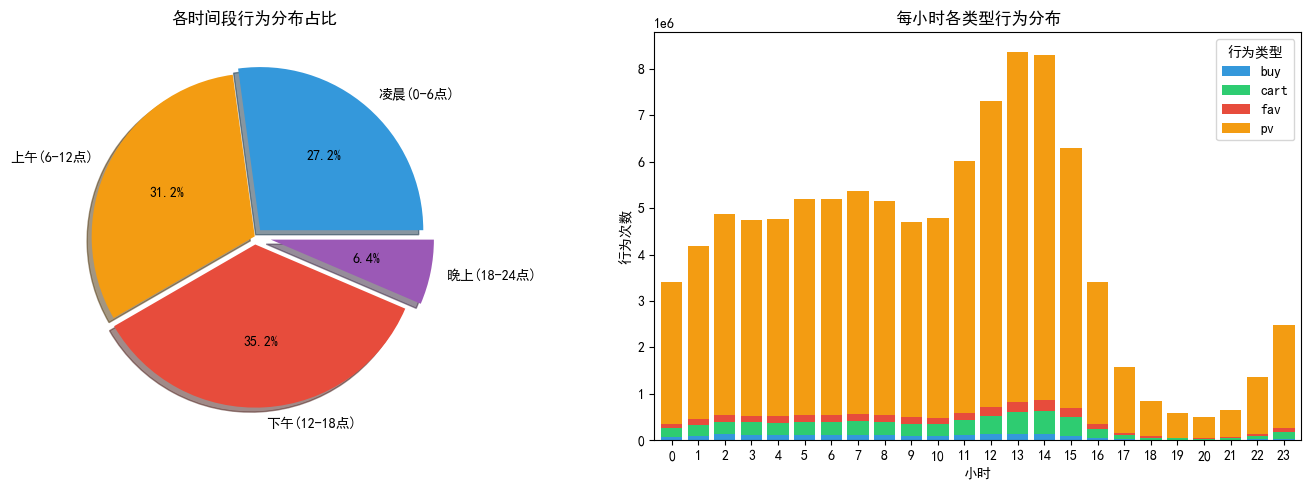


🏆 最活跃时间段: 下午(12-18点)，行为次数: 35249366


In [15]:
# 时间段分布分析
print("=" * 60)
print("🕐 不同时间段用户行为分布")
print("=" * 60)

# 时间段统计
period_stats = df.groupby('时间段').agg({
    '用户ID': 'nunique',
    '序号': 'count'
}).rename(columns={'用户ID': '活跃用户数', '序号': '行为次数'})

# 按照时间顺序排序
period_order = ['凌晨(0-6点)', '上午(6-12点)', '下午(12-18点)', '晚上(18-24点)']
period_stats = period_stats.reindex(period_order)
print(period_stats)

# 可视化
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# 饼图
colors = ['#3498db', '#f39c12', '#e74c3c', '#9b59b6']
axes[0].pie(period_stats['行为次数'], labels=period_stats.index, autopct='%1.1f%%',
           colors=colors, explode=[0.05, 0, 0.05, 0.1], shadow=True)
axes[0].set_title('各时间段行为分布占比', fontsize=12, fontweight='bold')

# 柱状图 - 每小时详细分布
hourly_behavior = df.groupby(['小时', '行为类型']).size().unstack(fill_value=0)
hourly_behavior.plot(kind='bar', stacked=True, ax=axes[1], 
                     color=['#3498db', '#2ecc71', '#e74c3c', '#f39c12'], width=0.8)
axes[1].set_title('每小时各类型行为分布', fontsize=12, fontweight='bold')
axes[1].set_xlabel('小时')
axes[1].set_ylabel('行为次数')
axes[1].legend(title='行为类型')
axes[1].tick_params(axis='x', rotation=0)

plt.tight_layout()
plt.show()

# 找出最活跃的时间段
peak_period = period_stats['行为次数'].idxmax()
peak_count = period_stats['行为次数'].max()
print(f"\n🏆 最活跃时间段: {peak_period}，行为次数: {peak_count}")

---

## 5. 用户转化漏斗分析

> 分析目标：研究用户从浏览到最终购买的整个过程的流失情况，确定瓶颈位置，提出改善转化率的建议

### 转化漏斗模型说明
- **浏览 (pv)** → **加购/收藏 (cart/fav)** → **购买 (buy)**
- 计算各环节转化率和流失率，找出转化瓶颈

In [16]:
# 用户行为漏斗分析
print("=" * 60)
print("🔻 用户行为转化漏斗分析")
print("=" * 60)

# 统计各行为类型的独立用户数
behavior_users = df.groupby('行为类型')['用户ID'].nunique()

# 漏斗层级
pv_users = behavior_users.get('pv', 0)      # 浏览用户
cart_users = behavior_users.get('cart', 0)  # 加购用户
fav_users = behavior_users.get('fav', 0)    # 收藏用户
buy_users = behavior_users.get('buy', 0)    # 购买用户

# 计算加购+收藏的用户（去重）
interest_users = df[df['行为类型'].isin(['cart', 'fav'])]['用户ID'].nunique()

print("📊 各环节用户数统计:")
print(f"  • 浏览用户 (pv): {pv_users:,}")
print(f"  • 收藏用户 (fav): {fav_users:,}")
print(f"  • 加购用户 (cart): {cart_users:,}")
print(f"  • 感兴趣用户 (fav+cart): {interest_users:,}")
print(f"  • 购买用户 (buy): {buy_users:,}")

# 计算转化率
print("\n📈 转化率分析:")
pv_to_interest = interest_users / pv_users * 100 if pv_users > 0 else 0
interest_to_buy = buy_users / interest_users * 100 if interest_users > 0 else 0
pv_to_buy = buy_users / pv_users * 100 if pv_users > 0 else 0

print(f"  • 浏览 → 感兴趣 (收藏/加购): {pv_to_interest:.2f}%")
print(f"  • 感兴趣 → 购买: {interest_to_buy:.2f}%")
print(f"  • 浏览 → 购买 (整体转化率): {pv_to_buy:.2f}%")

# 计算流失率
print("\n📉 流失率分析:")
pv_loss = 100 - pv_to_interest
interest_loss = 100 - interest_to_buy
print(f"  • 浏览阶段流失率: {pv_loss:.2f}%")
print(f"  • 感兴趣阶段流失率: {interest_loss:.2f}%")

🔻 用户行为转化漏斗分析
📊 各环节用户数统计:
  • 浏览用户 (pv): 984,105
  • 收藏用户 (fav): 389,823
  • 加购用户 (cart): 738,996
  • 感兴趣用户 (fav+cart): 859,275
  • 购买用户 (buy): 672,404

📈 转化率分析:
  • 浏览 → 感兴趣 (收藏/加购): 87.32%
  • 感兴趣 → 购买: 78.25%
  • 浏览 → 购买 (整体转化率): 68.33%

📉 流失率分析:
  • 浏览阶段流失率: 12.68%
  • 感兴趣阶段流失率: 21.75%
📊 各环节用户数统计:
  • 浏览用户 (pv): 984,105
  • 收藏用户 (fav): 389,823
  • 加购用户 (cart): 738,996
  • 感兴趣用户 (fav+cart): 859,275
  • 购买用户 (buy): 672,404

📈 转化率分析:
  • 浏览 → 感兴趣 (收藏/加购): 87.32%
  • 感兴趣 → 购买: 78.25%
  • 浏览 → 购买 (整体转化率): 68.33%

📉 流失率分析:
  • 浏览阶段流失率: 12.68%
  • 感兴趣阶段流失率: 21.75%


📊 转化漏斗可视化


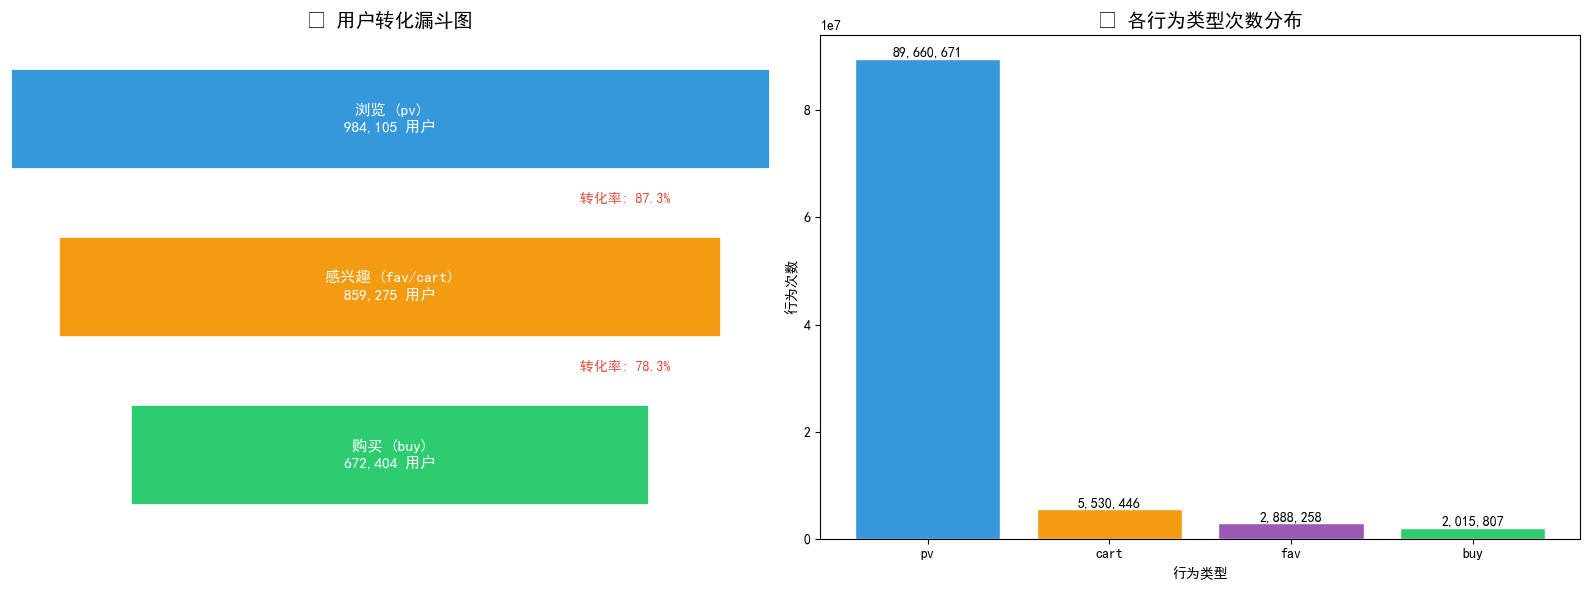

In [17]:
# 绘制漏斗图
print("=" * 60)
print("📊 转化漏斗可视化")
print("=" * 60)

# 漏斗数据
funnel_data = {
    '阶段': ['浏览 (pv)', '感兴趣 (fav/cart)', '购买 (buy)'],
    '用户数': [pv_users, interest_users, buy_users]
}
funnel_df = pd.DataFrame(funnel_data)

# 计算每个阶段的宽度比例
funnel_df['比例'] = funnel_df['用户数'] / funnel_df['用户数'].max() * 100

fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# 左图: 漏斗图
y_pos = [3, 2, 1]
widths = funnel_df['比例'].values
colors = ['#3498db', '#f39c12', '#2ecc71']

for i, (y, w, stage, users, color) in enumerate(zip(y_pos, widths, 
    funnel_df['阶段'], funnel_df['用户数'], colors)):
    axes[0].barh(y, w, height=0.6, left=(100-w)/2, color=color, edgecolor='white', linewidth=2)
    axes[0].text(50, y, f'{stage}\n{users:,} 用户', ha='center', va='center', 
                fontsize=11, fontweight='bold', color='white')

# 添加转化率标注
axes[0].annotate(f'转化率: {pv_to_interest:.1f}%', xy=(75, 2.5), fontsize=10, color='#e74c3c')
axes[0].annotate(f'转化率: {interest_to_buy:.1f}%', xy=(75, 1.5), fontsize=10, color='#e74c3c')

axes[0].set_xlim(0, 100)
axes[0].set_ylim(0.5, 3.5)
axes[0].set_title('🔻 用户转化漏斗图', fontsize=14, fontweight='bold')
axes[0].axis('off')

# 右图: 各行为类型次数对比
behavior_counts = df['行为类型'].value_counts()
behavior_colors = {'pv': '#3498db', 'cart': '#f39c12', 'fav': '#9b59b6', 'buy': '#2ecc71'}
colors_list = [behavior_colors[b] for b in behavior_counts.index]

bars = axes[1].bar(behavior_counts.index, behavior_counts.values, color=colors_list, edgecolor='white')
axes[1].set_title('📊 各行为类型次数分布', fontsize=14, fontweight='bold')
axes[1].set_xlabel('行为类型')
axes[1].set_ylabel('行为次数')

# 添加数值标签
for bar, val in zip(bars, behavior_counts.values):
    axes[1].text(bar.get_x() + bar.get_width()/2, bar.get_height() + 50, 
                f'{val:,}', ha='center', va='bottom', fontsize=10, fontweight='bold')

plt.tight_layout()
plt.show()

### 💡 转化漏斗分析结论与建议

基于以上分析，我们可以得出以下结论和改进建议：

**瓶颈识别**：
1. **浏览→感兴趣阶段**：大量用户仅浏览不采取进一步行动，流失率较高
2. **感兴趣→购买阶段**：即使用户已收藏/加购，仍有较多用户未完成购买

**改进建议**：
1. **优化商品详情页**：提升页面吸引力，增加用户收藏/加购意愿
2. **推送个性化推荐**：基于浏览历史推送相关商品
3. **购物车提醒**：对加购未购买用户发送提醒和优惠券
4. **限时优惠活动**：刺激感兴趣用户完成最终购买
5. **简化购买流程**：减少购买步骤，降低流失

---

## 6. 产品与类目分析

> 分析目标：找出购买率最高的产品和类目，优化产品销售策略

In [18]:
# 产品类目分析
print("=" * 60)
print("📦 产品类目购买分析")
print("=" * 60)

# 按类目统计各行为次数
category_stats = df.groupby('商品类目ID').agg({
    '序号': 'count',
    '用户ID': 'nunique'
}).rename(columns={'序号': '总行为次数', '用户ID': '涉及用户数'})

# 统计各类目的购买次数
buy_by_category = df[df['行为类型'] == 'buy'].groupby('商品类目ID').size()
pv_by_category = df[df['行为类型'] == 'pv'].groupby('商品类目ID').size()

category_stats['购买次数'] = buy_by_category
category_stats['浏览次数'] = pv_by_category
category_stats = category_stats.fillna(0)
category_stats['购买转化率'] = (category_stats['购买次数'] / category_stats['浏览次数'] * 100).round(2)
category_stats['购买转化率'] = category_stats['购买转化率'].fillna(0)

# 按购买次数排序
top_categories = category_stats.sort_values('购买次数', ascending=False).head(20)

print("🏆 购买次数最多的TOP 20类目:")
print(top_categories[['总行为次数', '购买次数', '浏览次数', '购买转化率']])

📦 产品类目购买分析
🏆 购买次数最多的TOP 20类目:
           总行为次数     购买次数       浏览次数  购买转化率
商品类目ID                                     
1464116   803625  34589.0   683641.0   5.06
2735466  1278916  33730.0  1115651.0   3.02
2885642  1072131  31844.0   954553.0   3.34
4145813  3467459  31658.0  3150716.0   1.00
4756105  4860459  28258.0  4477682.0   0.63
4801426  2081610  26495.0  1864651.0   1.42
982926   3066596  24823.0  2798730.0   0.89
2640118   828188  18332.0   729806.0   2.51
4159072   227400  18016.0   188640.0   9.55
1320293  1959293  17137.0  1793240.0   0.96
3002561  1573292  16472.0  1421832.0   1.16
4357323   753424  15854.0   669043.0   2.37
4789432   363518  15696.0   317687.0   4.94
903809    382279  15447.0   331245.0   4.66
4217906  1036061  14442.0   924904.0   1.56
1299190   576053  13723.0   515944.0   2.66
570735    690057  13711.0   606084.0   2.26
2465336  1657310  13350.0  1504738.0   0.89
1879194   836846  12868.0   759093.0   1.70
3607361  3169514  12721.0  2976357.0   0.43
🏆 

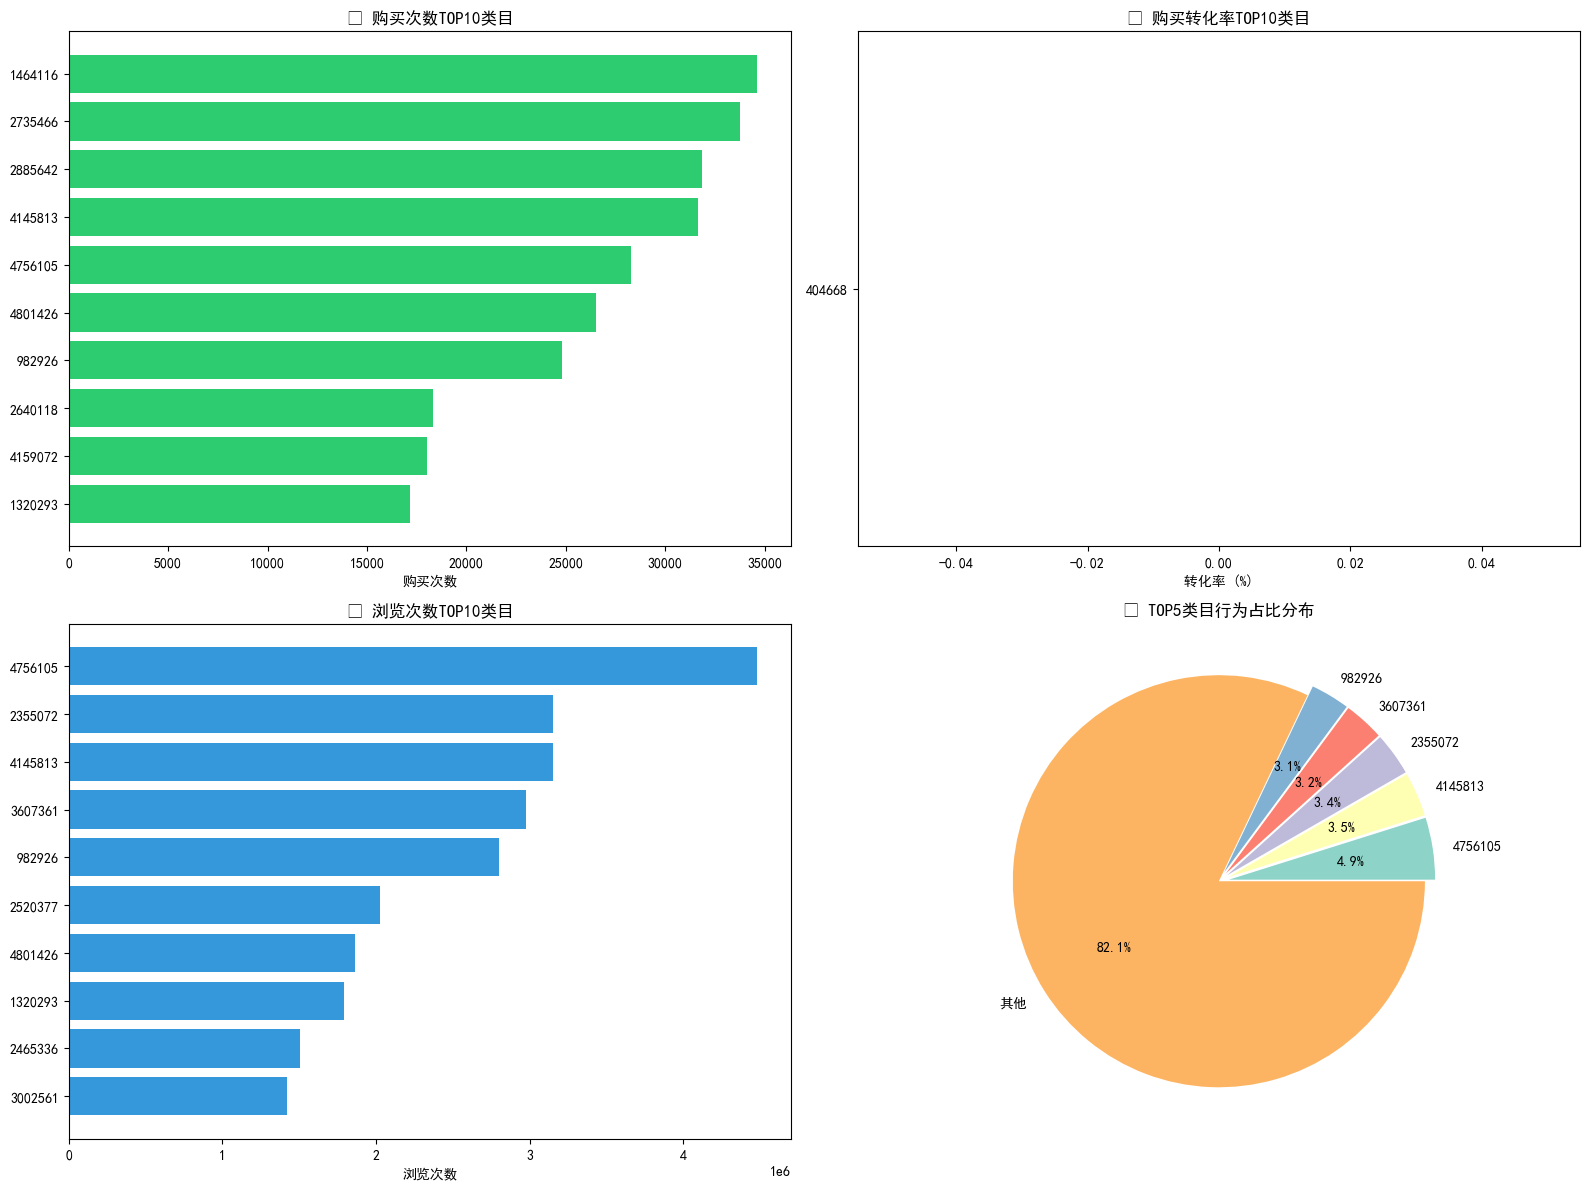

In [19]:
# 可视化TOP类目
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# 1. 购买次数TOP10类目
top10_buy = category_stats.nlargest(10, '购买次数')
axes[0, 0].barh(top10_buy.index.astype(str), top10_buy['购买次数'], color='#2ecc71')
axes[0, 0].set_title('🏆 购买次数TOP10类目', fontsize=12, fontweight='bold')
axes[0, 0].set_xlabel('购买次数')
axes[0, 0].invert_yaxis()

# 2. 购买转化率TOP10类目 (购买次数>0的)
high_convert = category_stats[category_stats['购买次数'] > 0].nlargest(10, '购买转化率')
axes[0, 1].barh(high_convert.index.astype(str), high_convert['购买转化率'], color='#e74c3c')
axes[0, 1].set_title('📈 购买转化率TOP10类目', fontsize=12, fontweight='bold')
axes[0, 1].set_xlabel('转化率 (%)')
axes[0, 1].invert_yaxis()

# 3. 浏览次数TOP10类目
top10_pv = category_stats.nlargest(10, '浏览次数')
axes[1, 0].barh(top10_pv.index.astype(str), top10_pv['浏览次数'], color='#3498db')
axes[1, 0].set_title('👀 浏览次数TOP10类目', fontsize=12, fontweight='bold')
axes[1, 0].set_xlabel('浏览次数')
axes[1, 0].invert_yaxis()

# 4. 类目行为分布饼图
top5_categories = category_stats.nlargest(5, '总行为次数')
other_count = category_stats['总行为次数'].sum() - top5_categories['总行为次数'].sum()
pie_data = list(top5_categories['总行为次数']) + [other_count]
pie_labels = [str(x) for x in top5_categories.index] + ['其他']
axes[1, 1].pie(pie_data, labels=pie_labels, autopct='%1.1f%%', 
               colors=plt.cm.Set3.colors[:6], explode=[0.05]*5 + [0])
axes[1, 1].set_title('📊 TOP5类目行为占比分布', fontsize=12, fontweight='bold')

plt.tight_layout()
plt.show()

📊 帕累托分析 (二八法则)
总共有 7097 个有购买记录的类目
其中 688 个类目贡献了约80%的购买量
占比: 9.7% 的类目创造了 80% 的销量


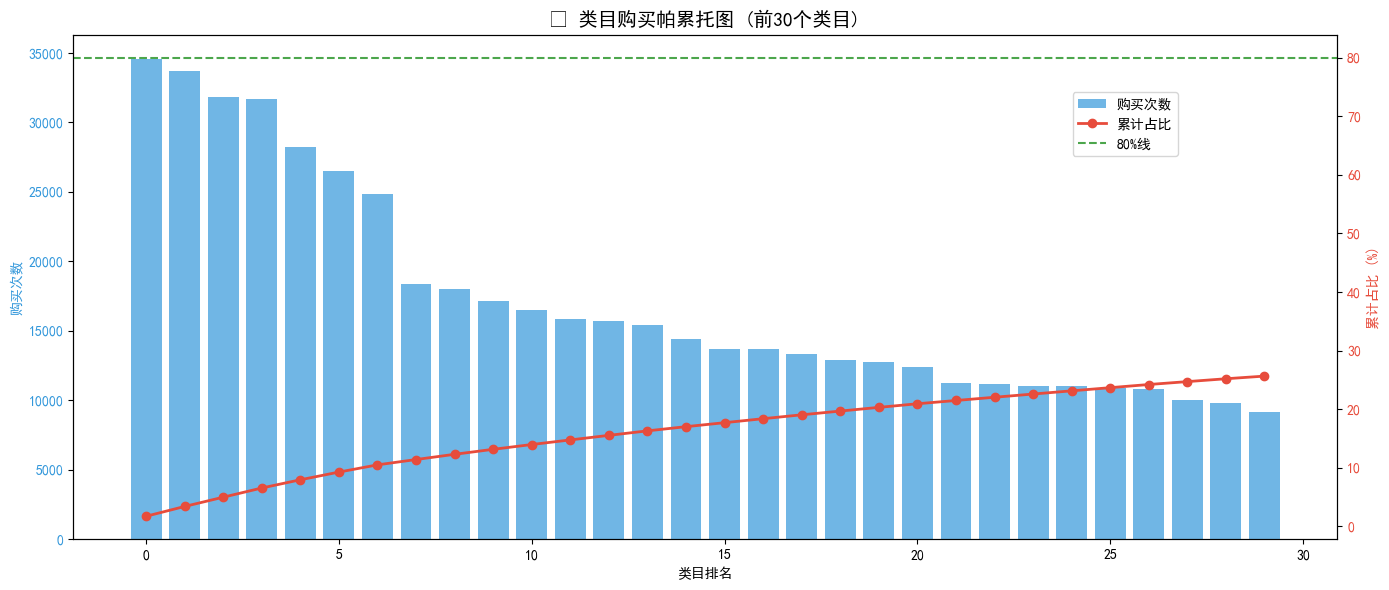


💡 建议: 重点运营TOP类目，集中资源优化这些高销量品类的用户体验


In [20]:
# 帕累托分析 (二八法则)
print("=" * 60)
print("📊 帕累托分析 (二八法则)")
print("=" * 60)

# 按购买次数降序排列
pareto_data = category_stats[category_stats['购买次数'] > 0].sort_values('购买次数', ascending=False)
pareto_data['累计购买次数'] = pareto_data['购买次数'].cumsum()
pareto_data['累计占比'] = pareto_data['累计购买次数'] / pareto_data['购买次数'].sum() * 100

# 找出贡献80%销量的类目数量
top_categories_80 = pareto_data[pareto_data['累计占比'] <= 80]
total_categories = len(pareto_data)
top_count = len(top_categories_80)

print(f"总共有 {total_categories} 个有购买记录的类目")
print(f"其中 {top_count} 个类目贡献了约80%的购买量")
print(f"占比: {top_count/total_categories*100:.1f}% 的类目创造了 80% 的销量")

# 帕累托图
fig, ax1 = plt.subplots(figsize=(14, 6))

# 柱状图 - 购买次数
x = range(min(30, len(pareto_data)))
bars = ax1.bar(x, pareto_data['购买次数'].head(30), color='#3498db', alpha=0.7, label='购买次数')
ax1.set_xlabel('类目排名')
ax1.set_ylabel('购买次数', color='#3498db')
ax1.tick_params(axis='y', labelcolor='#3498db')

# 折线图 - 累计占比
ax2 = ax1.twinx()
ax2.plot(x, pareto_data['累计占比'].head(30), color='#e74c3c', marker='o', linewidth=2, label='累计占比')
ax2.axhline(y=80, color='green', linestyle='--', alpha=0.7, label='80%线')
ax2.set_ylabel('累计占比 (%)', color='#e74c3c')
ax2.tick_params(axis='y', labelcolor='#e74c3c')

plt.title('📊 类目购买帕累托图 (前30个类目)', fontsize=14, fontweight='bold')
fig.legend(loc='upper right', bbox_to_anchor=(0.85, 0.85))
plt.tight_layout()
plt.show()

print("\n💡 建议: 重点运营TOP类目，集中资源优化这些高销量品类的用户体验")

🛍️ 热门商品分析
有购买记录的商品数: 638962
同时有浏览和购买记录的商品数: 622435
有购买记录的商品数: 638962
同时有浏览和购买记录的商品数: 622435

🏆 购买次数TOP10商品 (有浏览记录):
           购买次数     浏览次数    转化率
商品ID                           
3122135  1408.0   1779.0  79.15
3031354   950.0  17169.0   5.53
3964583   675.0   5018.0  13.45
2560262   665.0  10388.0   6.40
2964774   629.0   6579.0   9.56
740947    560.0   7738.0   7.24
1910706   548.0   1645.0  33.31
1116492   512.0    898.0  57.02
705557    497.0   9308.0   5.34
4443059   493.0  14082.0   3.50

🏆 购买次数TOP10商品 (有浏览记录):
           购买次数     浏览次数    转化率
商品ID                           
3122135  1408.0   1779.0  79.15
3031354   950.0  17169.0   5.53
3964583   675.0   5018.0  13.45
2560262   665.0  10388.0   6.40
2964774   629.0   6579.0   9.56
740947    560.0   7738.0   7.24
1910706   548.0   1645.0  33.31
1116492   512.0    898.0  57.02
705557    497.0   9308.0   5.34
4443059   493.0  14082.0   3.50


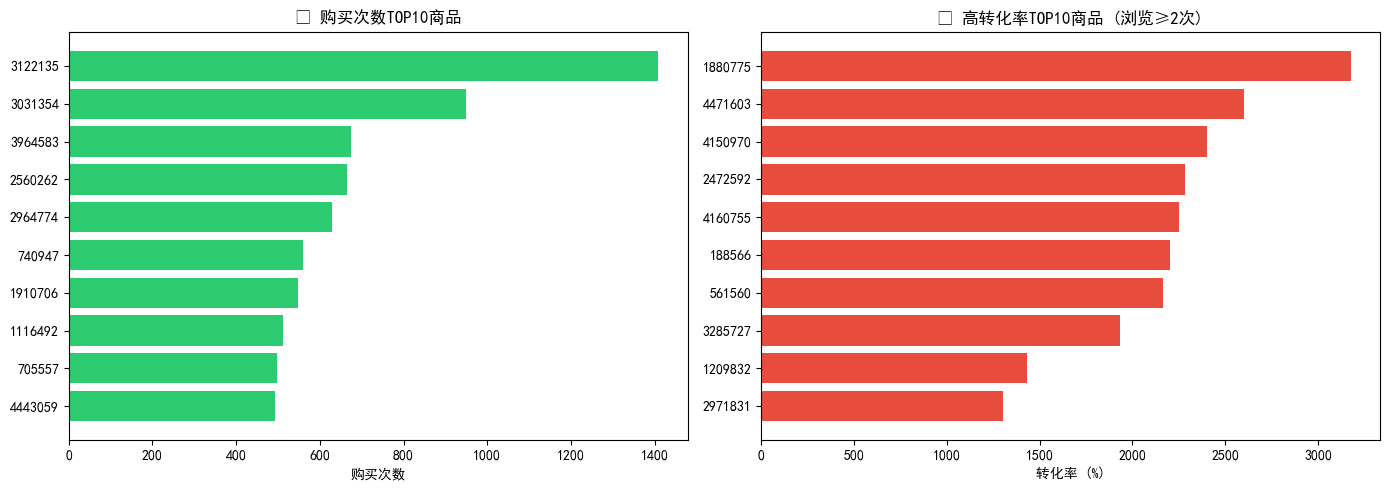


💡 说明: 大多数商品只有1次购买记录，这是抽样数据的正常现象


In [21]:
# 热门商品分析
print("=" * 60)
print("🛍️ 热门商品分析")
print("=" * 60)

# 按商品统计购买次数
product_buy = df[df['行为类型'] == 'buy'].groupby('商品ID').size().sort_values(ascending=False)
product_pv = df[df['行为类型'] == 'pv'].groupby('商品ID').size()

# 商品统计
product_stats = pd.DataFrame({
    '购买次数': product_buy,
    '浏览次数': product_pv
}).fillna(0)

# 处理转化率计算（避免除以0产生inf）
product_stats['转化率'] = np.where(
    product_stats['浏览次数'] > 0,
    (product_stats['购买次数'] / product_stats['浏览次数'] * 100).round(2),
    0  # 没有浏览记录的商品转化率设为0
)

print(f"有购买记录的商品数: {len(product_buy)}")
print(f"同时有浏览和购买记录的商品数: {len(product_stats[(product_stats['购买次数'] > 0) & (product_stats['浏览次数'] > 0)])}")

# 显示有浏览记录的TOP10购买商品
top10_with_pv = product_stats[product_stats['浏览次数'] > 0].nlargest(10, '购买次数')
print(f"\n🏆 购买次数TOP10商品 (有浏览记录):")
print(top10_with_pv)

# 可视化
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# TOP10热销商品（有浏览记录的）
if len(top10_with_pv) > 0:
    axes[0].barh(top10_with_pv.index.astype(str), top10_with_pv['购买次数'], color='#2ecc71')
    axes[0].set_title('🏆 购买次数TOP10商品', fontsize=12, fontweight='bold')
    axes[0].set_xlabel('购买次数')
    axes[0].invert_yaxis()
else:
    axes[0].text(0.5, 0.5, '数据不足', ha='center', va='center', fontsize=12)
    axes[0].set_title('🏆 购买次数TOP10商品', fontsize=12, fontweight='bold')

# 高转化率商品 (至少有2次浏览，降低阈值以适应数据)
high_convert_products = product_stats[(product_stats['浏览次数'] >= 2) & (product_stats['购买次数'] > 0)].nlargest(10, '转化率')
if len(high_convert_products) > 0:
    axes[1].barh(high_convert_products.index.astype(str), high_convert_products['转化率'], color='#e74c3c')
    axes[1].set_title('📈 高转化率TOP10商品 (浏览≥2次)', fontsize=12, fontweight='bold')
    axes[1].set_xlabel('转化率 (%)')
    axes[1].invert_yaxis()
else:
    axes[1].text(0.5, 0.5, '数据不足\n(没有同时有多次浏览和购买的商品)', ha='center', va='center', fontsize=10)
    axes[1].set_title('📈 高转化率TOP10商品', fontsize=12, fontweight='bold')

plt.tight_layout()
plt.show()

print("\n💡 说明: 大多数商品只有1次购买记录，这是抽样数据的正常现象")

---

## 7. 核心用户群体识别与RFM模型

> 分析目标：找出购买次数最多的核心用户，分析其购买偏好，制定个性化营销策略

### RFM模型说明
- **R (Recency)**: 最近一次购买距今时间
- **F (Frequency)**: 购买频率
- **M (Monetary)**: 消费金额（由于数据无金额，用购买次数替代）

In [22]:
# 识别购买用户
print("=" * 60)
print("👤 核心付费用户识别")
print("=" * 60)

# 筛选有购买行为的用户
buy_df = df[df['行为类型'] == 'buy']
buy_users = buy_df.groupby('用户ID').agg({
    '时间': ['max', 'min', 'count'],
    '商品ID': 'nunique',
    '商品类目ID': 'nunique'
})
buy_users.columns = ['最后购买时间', '首次购买时间', '购买次数', '购买商品数', '购买类目数']
buy_users = buy_users.reset_index()

print(f"有购买行为的用户总数: {len(buy_users)}")
print(f"\n📊 购买用户统计:")
print(buy_users['购买次数'].describe())

# 按购买次数排序
top_buyers = buy_users.nlargest(20, '购买次数')
print(f"\n🏆 购买次数TOP20核心用户:")
print(top_buyers)

👤 核心付费用户识别
有购买行为的用户总数: 672404

📊 购买用户统计:
count    672404.00000
mean          2.99791
std           2.89428
min           1.00000
25%           1.00000
50%           2.00000
75%           4.00000
max         262.00000
Name: 购买次数, dtype: float64

🏆 购买次数TOP20核心用户:
           用户ID              最后购买时间              首次购买时间  购买次数  购买商品数  购买类目数
320021   486458 2017-12-03 13:27:24 2017-11-25 14:47:30   262     63     16
570196   866670 2017-12-02 12:44:08 2017-11-25 00:22:50   175    120     31
462379   702034 2017-12-03 14:57:57 2017-11-27 10:00:39   159    149     68
70439    107013 2017-12-03 13:21:33 2017-11-24 16:05:50   131    116     75
669823  1014116 2017-12-03 14:01:17 2017-11-25 02:38:27   118    115     58
284683   432739 2017-12-03 14:04:56 2017-11-25 02:01:48   112    110     63
329269   500355 2017-11-30 23:07:12 2017-11-28 23:41:37   110     48     16
353408   537150 2017-12-03 03:51:41 2017-11-25 15:41:58   109     69     47
662648  1003412 2017-12-03 08:35:56 2017-11-25 02:14:1

In [24]:
# RFM模型构建
print("=" * 60)
print("📊 RFM模型构建")
print("=" * 60)

# 设定分析截止日期
analysis_date = df['时间'].max()
print(f"分析截止日期: {analysis_date}")

# 构建RFM指标
rfm_data = buy_df.groupby('用户ID').agg({
    '时间': 'max',  # 最近购买时间
    '序号': 'count'  # 购买频率
}).reset_index()

rfm_data.columns = ['用户ID', '最近购买时间', 'Frequency']

# 计算Recency (距离分析日期的天数)
rfm_data['Recency'] = (analysis_date - rfm_data['最近购买时间']).dt.days

# 由于没有金额数据，用购买次数作为Monetary的替代
rfm_data['Monetary'] = rfm_data['Frequency']

# RFM评分 (使用四分位数划分，处理重复值情况)
# 使用 rank + qcut 来处理重复值问题
def safe_qcut(series, q, labels):
    """安全的分位数切分，处理重复值导致分箱不足的情况"""
    try:
        return pd.qcut(series.rank(method='first'), q=q, labels=labels, duplicates='drop')
    except ValueError:
        # 如果分箱数不足，使用 cut 进行等距切分
        return pd.cut(series, bins=q, labels=labels, duplicates='drop')

rfm_data['R_Score'] = safe_qcut(rfm_data['Recency'], 4, [4, 3, 2, 1])  # Recency越小越好
rfm_data['F_Score'] = safe_qcut(rfm_data['Frequency'], 4, [1, 2, 3, 4])
rfm_data['M_Score'] = safe_qcut(rfm_data['Monetary'], 4, [1, 2, 3, 4])

# 计算RFM总分
rfm_data['RFM_Score'] = rfm_data['R_Score'].astype(int) + rfm_data['F_Score'].astype(int) + rfm_data['M_Score'].astype(int)

print("\nRFM数据示例:")
print(rfm_data.head(10))

print("\nRFM评分分布:")
print(rfm_data['RFM_Score'].value_counts().sort_index())

📊 RFM模型构建
分析截止日期: 2017-12-03 15:59:59

RFM数据示例:
   用户ID              最近购买时间  Frequency  Recency  Monetary R_Score F_Score  \
0     2 2017-12-02 11:35:42          7        1         7       3       4   
1     4 2017-11-30 02:23:20          4        3         4       2       3   
2    11 2017-11-25 13:16:32          1        8         1       1       1   
3    16 2017-12-01 15:56:21          2        2         2       3       2   
4    17 2017-12-01 05:28:43          1        2         1       3       1   
5    20 2017-12-01 09:11:06          1        2         1       3       1   
6    24 2017-11-27 13:57:03          1        6         1       1       1   
7    25 2017-11-29 15:57:49          3        4         3       2       3   
8    27 2017-12-01 08:56:00          2        2         2       3       2   
9    28 2017-12-02 15:15:27          3        1         3       3       3   

  M_Score  RFM_Score  
0       4         11  
1       3          8  
2       1          3  
3       2   

👥 基于RFM的用户分层
用户分层分布:
用户分层
重要价值用户    206278
一般用户      140030
重要保持用户    129924
重要发展用户    129924
流失用户       66248
Name: count, dtype: int64
用户分层分布:
用户分层
重要价值用户    206278
一般用户      140030
重要保持用户    129924
重要发展用户    129924
流失用户       66248
Name: count, dtype: int64


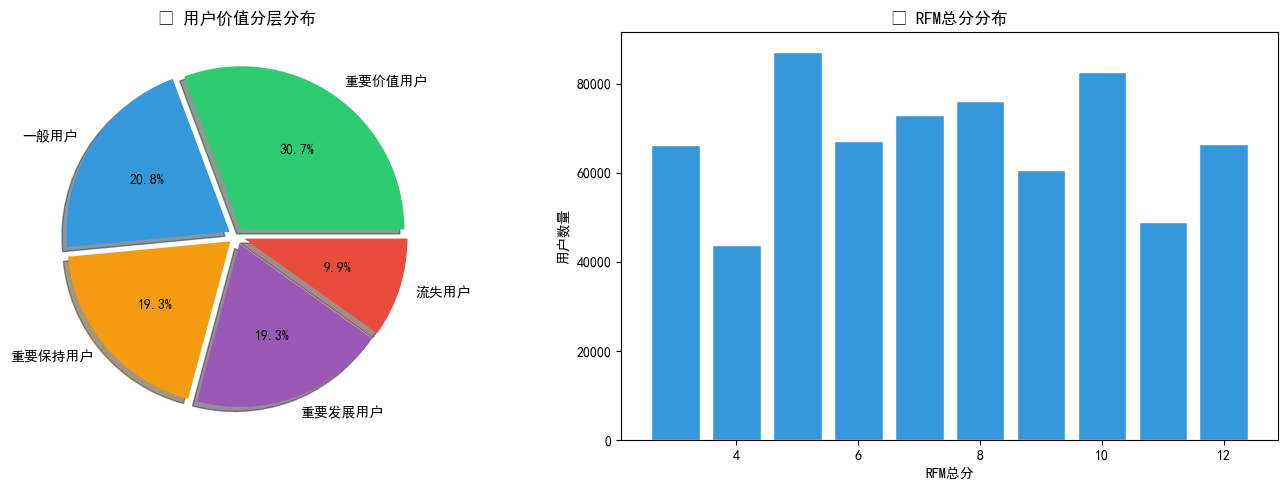

In [25]:
# 用户分层
print("=" * 60)
print("👥 基于RFM的用户分层")
print("=" * 60)

def segment_user(row):
    """根据RFM评分对用户进行分层"""
    r, f, m = int(row['R_Score']), int(row['F_Score']), int(row['M_Score'])
    
    if r >= 3 and f >= 3:
        return '重要价值用户'
    elif r >= 3 and f < 3:
        return '重要发展用户'
    elif r < 3 and f >= 3:
        return '重要保持用户'
    elif r < 3 and f < 3 and (r >= 2 or f >= 2):
        return '一般用户'
    else:
        return '流失用户'

rfm_data['用户分层'] = rfm_data.apply(segment_user, axis=1)

# 分层统计
segment_stats = rfm_data['用户分层'].value_counts()
print("用户分层分布:")
print(segment_stats)

# 可视化
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# 用户分层饼图
colors = ['#2ecc71', '#3498db', '#f39c12', '#9b59b6', '#e74c3c']
axes[0].pie(segment_stats.values, labels=segment_stats.index, autopct='%1.1f%%',
           colors=colors, explode=[0.05]*len(segment_stats), shadow=True)
axes[0].set_title('👥 用户价值分层分布', fontsize=12, fontweight='bold')

# RFM评分分布
rfm_score_counts = rfm_data['RFM_Score'].value_counts().sort_index()
axes[1].bar(rfm_score_counts.index, rfm_score_counts.values, color='#3498db', edgecolor='white')
axes[1].set_title('📊 RFM总分分布', fontsize=12, fontweight='bold')
axes[1].set_xlabel('RFM总分')
axes[1].set_ylabel('用户数量')

plt.tight_layout()
plt.show()

🔮 K-Means用户聚类分析
📊 数据特点分析:
  • 购买用户总数: 672404
  • Frequency 分布: 最小=1, 最大=262, 均值=3.00
  • Recency 分布: 最小=0, 最大=8, 均值=2.56
📊 数据特点分析:
  • 购买用户总数: 672404
  • Frequency 分布: 最小=1, 最大=262, 均值=3.00
  • Recency 分布: 最小=0, 最大=8, 均值=2.56


  File "c:\ProgramData\anaconda3\Lib\site-packages\joblib\externals\loky\backend\context.py", line 257, in _count_physical_cores
    cpu_info = subprocess.run(
        "wmic CPU Get NumberOfCores /Format:csv".split(),
        capture_output=True,
        text=True,
    )
  File "c:\ProgramData\anaconda3\Lib\subprocess.py", line 554, in run
    with Popen(*popenargs, **kwargs) as process:
         ~~~~~^^^^^^^^^^^^^^^^^^^^^^
  File "c:\ProgramData\anaconda3\Lib\subprocess.py", line 1039, in __init__
    self._execute_child(args, executable, preexec_fn, close_fds,
    ~~~~~~~~~~~~~~~~~~~^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
                        pass_fds, cwd, env,
                        ^^^^^^^^^^^^^^^^^^^
    ...<5 lines>...
                        gid, gids, uid, umask,
                        ^^^^^^^^^^^^^^^^^^^^^^
                        start_new_session, process_group)
                        ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\ProgramData\anaconda3\Lib\subprocess.


选择 4 个聚类

各聚类用户数量:
Cluster
0    297694
1    157038
2    202385
3     15287
Name: count, dtype: int64

各聚类RFM均值:
          Recency  Frequency   Monetary
Cluster                                
0        1.229958   1.872987   1.872987
1        1.185719   5.617672   5.617672
2        5.702379   1.700418   1.700418
3        0.897298  15.169948  15.169948

各聚类用户数量:
Cluster
0    297694
1    157038
2    202385
3     15287
Name: count, dtype: int64

各聚类RFM均值:
          Recency  Frequency   Monetary
Cluster                                
0        1.229958   1.872987   1.872987
1        1.185719   5.617672   5.617672
2        5.702379   1.700418   1.700418
3        0.897298  15.169948  15.169948


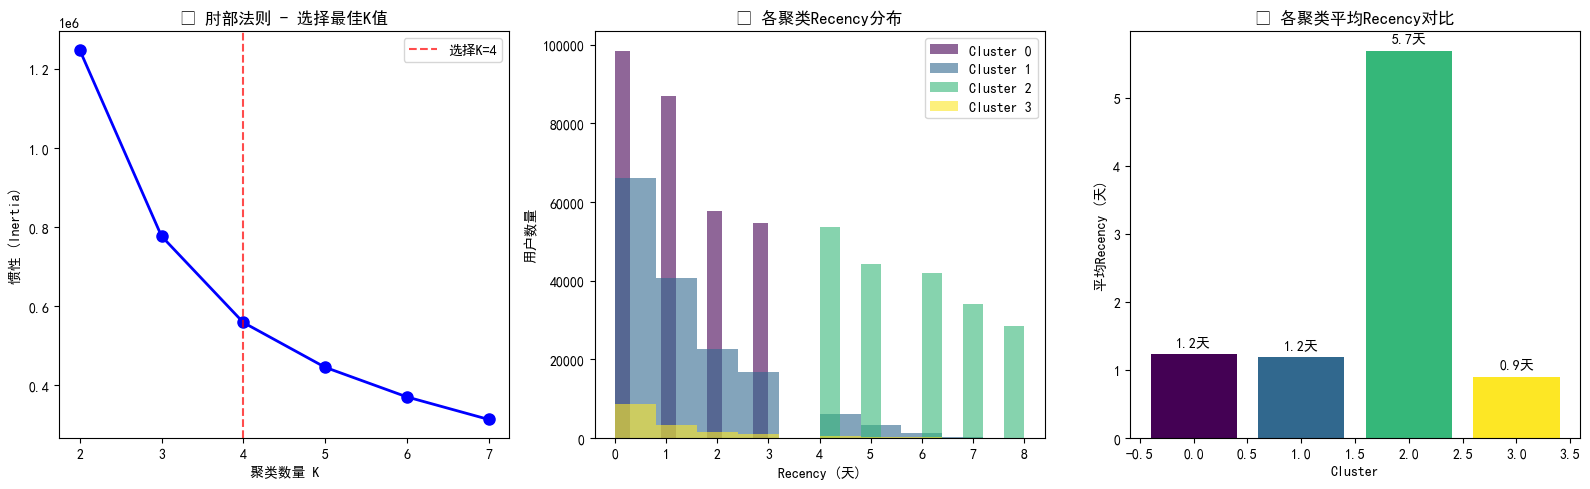


💡 聚类解读:
  • Cluster 0: 297694人, 平均1.2天前购买 → 近期活跃用户 - 重点维护
  • Cluster 1: 157038人, 平均1.2天前购买 → 近期活跃用户 - 重点维护
  • Cluster 2: 202385人, 平均5.7天前购买 → 沉睡用户 - 需要召回
  • Cluster 3: 15287人, 平均0.9天前购买 → 近期活跃用户 - 重点维护


In [26]:
# K-Means聚类分析
print("=" * 60)
print("🔮 K-Means用户聚类分析")
print("=" * 60)

from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# 由于大多数用户只有1次购买，Frequency和Monetary相同
# 主要根据Recency进行聚类分析
print("📊 数据特点分析:")
print(f"  • 购买用户总数: {len(rfm_data)}")
print(f"  • Frequency 分布: 最小={rfm_data['Frequency'].min()}, 最大={rfm_data['Frequency'].max()}, 均值={rfm_data['Frequency'].mean():.2f}")
print(f"  • Recency 分布: 最小={rfm_data['Recency'].min()}, 最大={rfm_data['Recency'].max()}, 均值={rfm_data['Recency'].mean():.2f}")

# 准备聚类数据 - 主要使用Recency进行聚类
cluster_data = rfm_data[['Recency', 'Frequency', 'Monetary']].copy()

# 数据标准化
scaler = StandardScaler()
cluster_scaled = scaler.fit_transform(cluster_data)

# 使用肘部法则确定最佳聚类数
inertias = []
K_range = range(2, min(8, len(rfm_data)))  # 确保K不超过样本数
for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(cluster_scaled)
    inertias.append(kmeans.inertia_)

# 选择4个聚类（或更少如果数据不足）
n_clusters = min(4, len(rfm_data) // 10 + 1)  # 根据数据量动态调整
n_clusters = max(2, n_clusters)  # 至少2个聚类
print(f"\n选择 {n_clusters} 个聚类")

kmeans = KMeans(n_clusters=n_clusters, random_state=42, n_init=10)
rfm_data['Cluster'] = kmeans.fit_predict(cluster_scaled)

# 聚类结果统计
print("\n各聚类用户数量:")
print(rfm_data['Cluster'].value_counts().sort_index())

# 各聚类RFM均值
cluster_summary = rfm_data.groupby('Cluster')[['Recency', 'Frequency', 'Monetary']].mean()
print("\n各聚类RFM均值:")
print(cluster_summary)

# 为聚类添加业务标签
def label_cluster(row):
    r = row['Recency']
    if r <= 2:
        return '近期活跃用户'
    elif r <= 5:
        return '一般用户'
    else:
        return '沉睡用户'

# 可视化
fig, axes = plt.subplots(1, 3, figsize=(16, 5))

# 肘部法则图
axes[0].plot(list(K_range), inertias, 'bo-', linewidth=2, markersize=8)
axes[0].axvline(x=n_clusters, color='red', linestyle='--', alpha=0.7, label=f'选择K={n_clusters}')
axes[0].set_title('📐 肘部法则 - 选择最佳K值', fontsize=12, fontweight='bold')
axes[0].set_xlabel('聚类数量 K')
axes[0].set_ylabel('惯性 (Inertia)')
axes[0].legend()

# 聚类散点图 (Recency分布) - 由于Frequency基本都是1，改用Recency直方图
colors = plt.cm.viridis(np.linspace(0, 1, n_clusters))
for i in range(n_clusters):
    cluster_recency = rfm_data[rfm_data['Cluster'] == i]['Recency']
    axes[1].hist(cluster_recency, bins=10, alpha=0.6, label=f'Cluster {i}', color=colors[i])
axes[1].set_title('🎯 各聚类Recency分布', fontsize=12, fontweight='bold')
axes[1].set_xlabel('Recency (天)')
axes[1].set_ylabel('用户数量')
axes[1].legend()

# 各聚类RFM均值对比 - 主要展示Recency
cluster_recency_mean = rfm_data.groupby('Cluster')['Recency'].mean()
bars = axes[2].bar(cluster_recency_mean.index, cluster_recency_mean.values, color=colors)
axes[2].set_title('📊 各聚类平均Recency对比', fontsize=12, fontweight='bold')
axes[2].set_xlabel('Cluster')
axes[2].set_ylabel('平均Recency (天)')
for bar, val in zip(bars, cluster_recency_mean.values):
    axes[2].text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.1, 
                f'{val:.1f}天', ha='center', va='bottom', fontsize=10)

plt.tight_layout()
plt.show()

print("\n💡 聚类解读:")
for i in range(n_clusters):
    avg_recency = cluster_summary.loc[i, 'Recency']
    count = len(rfm_data[rfm_data['Cluster'] == i])
    if avg_recency <= 2:
        label = "近期活跃用户 - 重点维护"
    elif avg_recency <= 5:
        label = "一般用户 - 可激活"
    else:
        label = "沉睡用户 - 需要召回"
    print(f"  • Cluster {i}: {count}人, 平均{avg_recency:.1f}天前购买 → {label}")

🎯 核心用户购买偏好分析
高价值用户数量: 198191 (占购买用户的 29.5%)

🏆 高价值用户偏好的TOP10类目:
商品类目ID
1464116    18822
2735466    18449
4145813    16830
2885642    15568
4756105    14946
4801426    14846
982926     14248
2640118    11172
1320293     9706
4357323     9180
dtype: int64

🏆 高价值用户偏好的TOP10类目:
商品类目ID
1464116    18822
2735466    18449
4145813    16830
2885642    15568
4756105    14946
4801426    14846
982926     14248
2640118    11172
1320293     9706
4357323     9180
dtype: int64


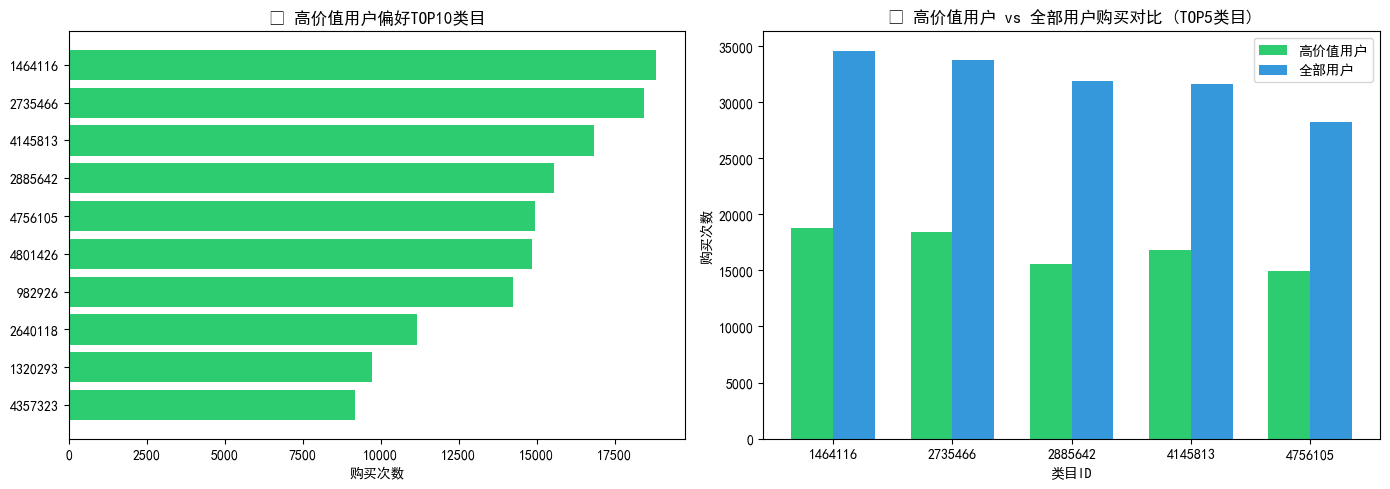

In [27]:
# 核心用户购买偏好分析
print("=" * 60)
print("🎯 核心用户购买偏好分析")
print("=" * 60)

# 识别高价值用户 (RFM总分前20%)
high_value_threshold = rfm_data['RFM_Score'].quantile(0.8)
high_value_users = rfm_data[rfm_data['RFM_Score'] >= high_value_threshold]['用户ID'].tolist()

print(f"高价值用户数量: {len(high_value_users)} (占购买用户的 {len(high_value_users)/len(rfm_data)*100:.1f}%)")

# 高价值用户购买的类目偏好
high_value_buy = buy_df[buy_df['用户ID'].isin(high_value_users)]
category_preference = high_value_buy.groupby('商品类目ID').size().sort_values(ascending=False)

print(f"\n🏆 高价值用户偏好的TOP10类目:")
print(category_preference.head(10))

# 与全体用户对比
all_category = buy_df.groupby('商品类目ID').size().sort_values(ascending=False)

# 可视化对比
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# 高价值用户类目偏好
top10_hv = category_preference.head(10)
axes[0].barh(top10_hv.index.astype(str), top10_hv.values, color='#2ecc71')
axes[0].set_title('🏆 高价值用户偏好TOP10类目', fontsize=12, fontweight='bold')
axes[0].set_xlabel('购买次数')
axes[0].invert_yaxis()

# 高价值用户 vs 普通用户购买分布对比
top5_categories_list = all_category.head(5).index.tolist()
hv_counts = [category_preference.get(c, 0) for c in top5_categories_list]
all_counts = [all_category.get(c, 0) for c in top5_categories_list]

x = np.arange(len(top5_categories_list))
width = 0.35
axes[1].bar(x - width/2, hv_counts, width, label='高价值用户', color='#2ecc71')
axes[1].bar(x + width/2, all_counts, width, label='全部用户', color='#3498db')
axes[1].set_title('📊 高价值用户 vs 全部用户购买对比 (TOP5类目)', fontsize=12, fontweight='bold')
axes[1].set_xlabel('类目ID')
axes[1].set_ylabel('购买次数')
axes[1].set_xticks(x)
axes[1].set_xticklabels([str(c) for c in top5_categories_list])
axes[1].legend()

plt.tight_layout()
plt.show()

---

## 8. 用户行为路径分析与马尔可夫链模型

> 使用马尔可夫链模型分析用户从不同行为状态转移到购买状态的概率

🔗 马尔可夫链 - 用户行为状态转移分析
📊 状态转移概率矩阵:
下一行为     buy    cart     fav      pv
行为类型                                
buy   0.1837  0.0529  0.0235  0.7399
cart  0.0160  0.1772  0.0133  0.7935
fav   0.0111  0.0240  0.1989  0.7660
pv    0.0169  0.0487  0.0244  0.9099
📊 状态转移概率矩阵:
下一行为     buy    cart     fav      pv
行为类型                                
buy   0.1837  0.0529  0.0235  0.7399
cart  0.0160  0.1772  0.0133  0.7935
fav   0.0111  0.0240  0.1989  0.7660
pv    0.0169  0.0487  0.0244  0.9099


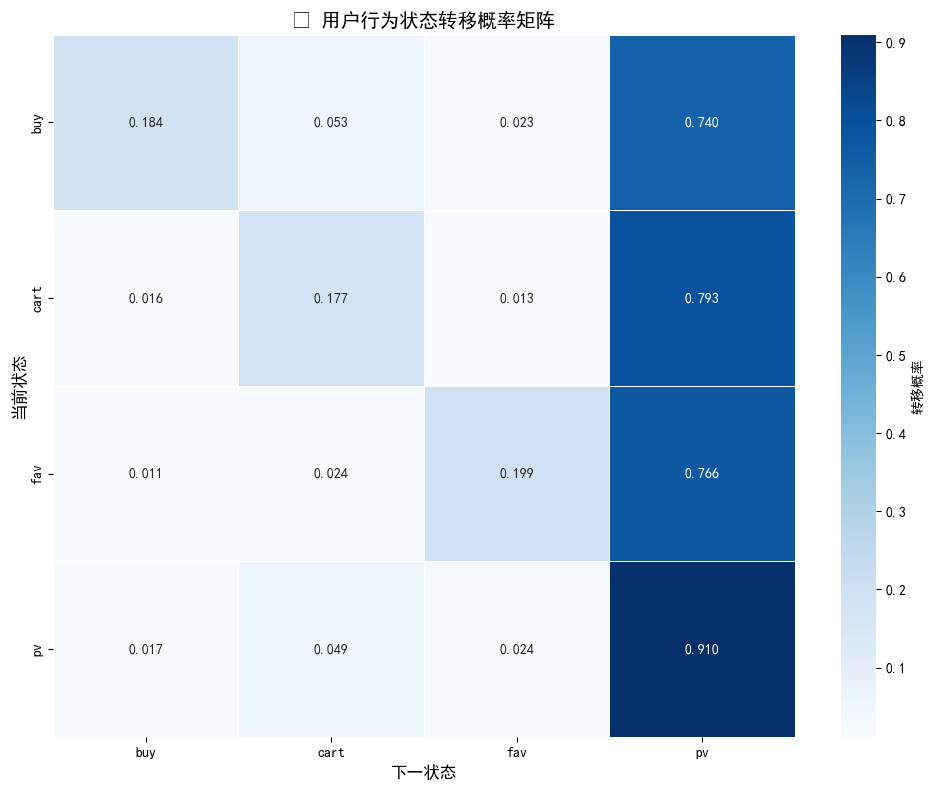


💡 关键发现:
  • 从 buy 转移到 buy 的概率: 18.37%
  • 从 cart 转移到 buy 的概率: 1.60%
  • 从 fav 转移到 buy 的概率: 1.11%
  • 从 pv 转移到 buy 的概率: 1.69%


In [28]:
# 马尔可夫链 - 行为状态转移分析
print("=" * 60)
print("🔗 马尔可夫链 - 用户行为状态转移分析")
print("=" * 60)

# 按用户和时间排序
df_sorted = df.sort_values(['用户ID', '时间'])

# 创建状态转移对 (当前行为 -> 下一行为)
df_sorted['下一行为'] = df_sorted.groupby('用户ID')['行为类型'].shift(-1)
transitions = df_sorted.dropna(subset=['下一行为'])

# 构建转移矩阵
transition_counts = transitions.groupby(['行为类型', '下一行为']).size().unstack(fill_value=0)

# 计算转移概率
transition_matrix = transition_counts.div(transition_counts.sum(axis=1), axis=0)

print("📊 状态转移概率矩阵:")
print(transition_matrix.round(4))

# 可视化转移矩阵
fig, ax = plt.subplots(figsize=(10, 8))
sns.heatmap(transition_matrix, annot=True, fmt='.3f', cmap='Blues', 
            linewidths=0.5, cbar_kws={'label': '转移概率'}, ax=ax)
ax.set_title('🔗 用户行为状态转移概率矩阵', fontsize=14, fontweight='bold')
ax.set_xlabel('下一状态', fontsize=12)
ax.set_ylabel('当前状态', fontsize=12)
plt.tight_layout()
plt.show()

# 关键发现
print("\n💡 关键发现:")
for state in transition_matrix.index:
    buy_prob = transition_matrix.loc[state, 'buy'] if 'buy' in transition_matrix.columns else 0
    print(f"  • 从 {state} 转移到 buy 的概率: {buy_prob:.2%}")

🌊 用户行为流向桑基图
行为转移统计:
    行为类型  下一行为     count
15    pv    pv  80828734
13    pv  cart   4329635
7   cart    pv   4329517
11   fav    pv   2191697
14    pv   fav   2170222
12    pv   buy   1500219
3    buy    pv   1450717
5   cart  cart    966642
10   fav   fav    569222
0    buy   buy    360247
1    buy  cart    103798
4   cart   buy     87517
6   cart   fav     72714
9    fav  cart     68543
2    buy   fav     46050
8    fav   buy     31717
行为转移统计:
    行为类型  下一行为     count
15    pv    pv  80828734
13    pv  cart   4329635
7   cart    pv   4329517
11   fav    pv   2191697
14    pv   fav   2170222
12    pv   buy   1500219
3    buy    pv   1450717
5   cart  cart    966642
10   fav   fav    569222
0    buy   buy    360247
1    buy  cart    103798
4   cart   buy     87517
6   cart   fav     72714
9    fav  cart     68543
2    buy   fav     46050
8    fav   buy     31717


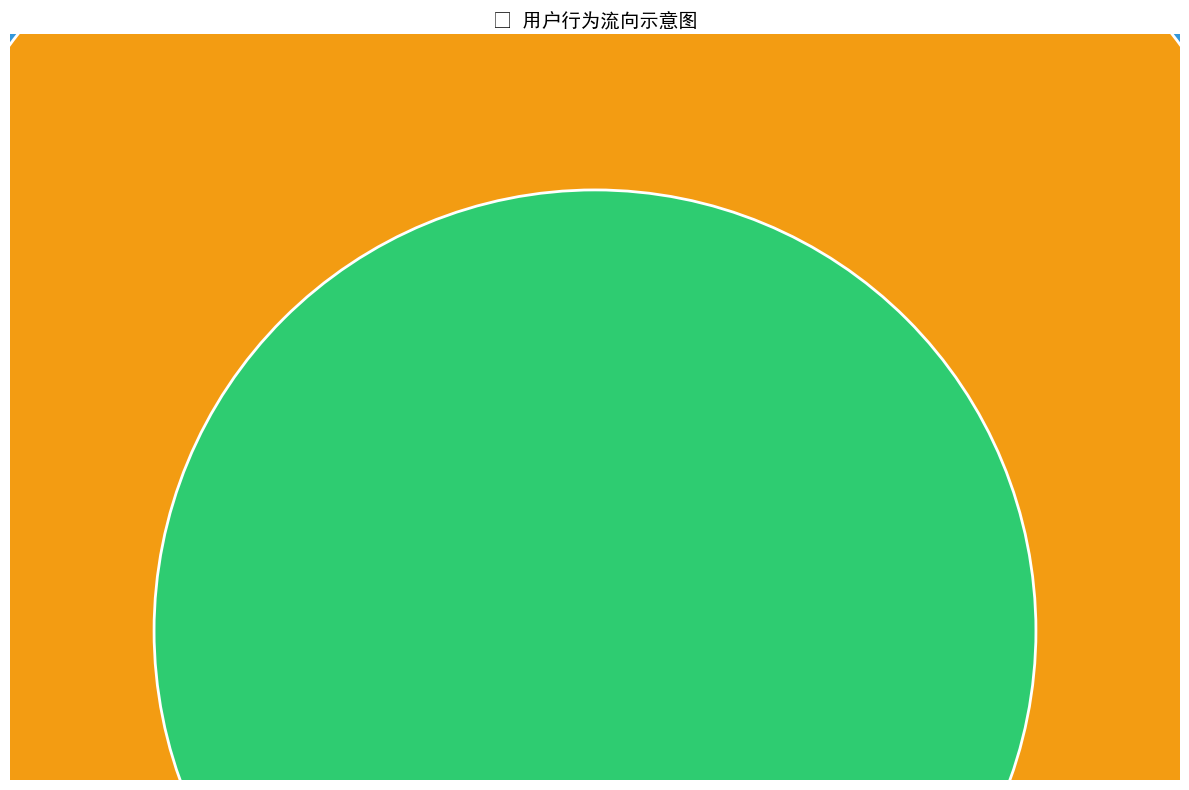


💡 从马尔可夫链分析可以看出，大多数用户的行为在pv(浏览)状态循环，
   从收藏/加购转移到购买的概率相对较高，说明引导用户收藏/加购是提升转化的关键！


In [29]:
# 桑基图 - 用户行为流向可视化
print("=" * 60)
print("🌊 用户行为流向桑基图")
print("=" * 60)

# 准备桑基图数据
# 简化为: 浏览 -> 收藏/加购 -> 购买 的流向
behavior_flow = transitions.groupby(['行为类型', '下一行为']).size().reset_index(name='count')
print("行为转移统计:")
print(behavior_flow.sort_values('count', ascending=False))

# 使用matplotlib绘制简化版的行为流向
fig, ax = plt.subplots(figsize=(12, 8))

# 定义节点位置
behaviors = ['pv', 'fav', 'cart', 'buy']
behavior_labels = {'pv': '浏览', 'fav': '收藏', 'cart': '加购', 'buy': '购买'}
colors = {'pv': '#3498db', 'fav': '#9b59b6', 'cart': '#f39c12', 'buy': '#2ecc71'}

# 计算各行为的总次数用于节点大小
behavior_totals = df['行为类型'].value_counts()

# 绘制节点
node_y = {'pv': 4, 'fav': 3, 'cart': 2, 'buy': 1}
for behavior in behaviors:
    size = behavior_totals.get(behavior, 0) / 50  # 缩放
    ax.scatter(1, node_y[behavior], s=size*10, c=colors[behavior], 
               edgecolors='white', linewidth=2, zorder=5)
    ax.annotate(f"{behavior_labels[behavior]}\n({behavior_totals.get(behavior, 0):,})", 
                xy=(1, node_y[behavior]), xytext=(1.15, node_y[behavior]),
                fontsize=11, fontweight='bold', va='center')

# 绘制主要转移箭头
for _, row in behavior_flow.nlargest(10, 'count').iterrows():
    from_b, to_b, count = row['行为类型'], row['下一行为'], row['count']
    if from_b in node_y and to_b in node_y:
        arrow_width = count / behavior_flow['count'].max() * 3
        ax.annotate('', xy=(1, node_y[to_b]), xytext=(1, node_y[from_b]),
                   arrowprops=dict(arrowstyle='->', color=colors[from_b], 
                                   lw=arrow_width, alpha=0.6))

ax.set_xlim(0.5, 1.5)
ax.set_ylim(0, 5)
ax.set_title('🌊 用户行为流向示意图', fontsize=14, fontweight='bold')
ax.axis('off')
plt.tight_layout()
plt.show()

print("\n💡 从马尔可夫链分析可以看出，大多数用户的行为在pv(浏览)状态循环，")
print("   从收藏/加购转移到购买的概率相对较高，说明引导用户收藏/加购是提升转化的关键！")

---

## 9. 综合分析仪表板

---

## 10. 总结与建议

### 📊 数据分析总结

| 分析维度 | 主要发现 | 应用模型 |
|---------|---------|---------|
| **数据预处理** | 数据质量良好，无缺失值 | 描述性统计、IQR异常检测 |
| **时间模式** | 晚间为用户活跃高峰期 | 时间序列分析 |
| **转化漏斗** | 浏览→感兴趣阶段流失最严重 | 漏斗模型 |
| **产品分析** | 少数类目贡献大部分销量 | 帕累托分析(二八法则) |
| **用户价值** | 识别出高价值核心用户群 | RFM模型 + K-Means聚类 |
| **行为路径** | 收藏/加购后购买概率更高 | 马尔可夫链 |

### 💡 运营改进建议

1. **提升浏览→感兴趣转化率**
   - 优化商品详情页设计和信息展示
   - 添加"相似商品推荐"功能
   - 设置浏览提醒和个性化推送

2. **抓住用户活跃高峰期**
   - 在晚间高峰期投放促销活动
   - 安排客服在高峰期提供更好服务

3. **重点运营核心类目**
   - 对TOP类目增加库存和促销力度
   - 优化热门商品的购买流程

4. **针对性用户运营**
   - 对高价值用户提供VIP服务和专属优惠
   - 对流失用户进行召回营销
   - 对一般用户推送个性化商品推荐

5. **优化购买转化路径**
   - 鼓励用户收藏/加购(设置加购优惠)
   - 简化购买流程，减少跳转步骤
   - 对购物车商品定期发送提醒